# Ground Truth from Stand-Up Comedy Transcripts

### 1. Seperate the transcript into individual sentences and map the timestamps of the audio with the sentences

Forced Alignment was done via the aid of Aeneas

### 2. Use Laughter Detection Tool to find the laughter in the given audio

Laughter Detection is Done via

https://colab.research.google.com/drive/1ixYPfET1HXgxr2K1SjgYY11-BKu7u_UZ?usp=sharing&pli=1&authuser=2#scrollTo=R3LqFPm9biYP

https://colab.research.google.com/drive/1ixYPfET1HXgxr2K1SjgYY11-BKu7u_UZ#scrollTo=R3LqFPm9biYP

### 3. Match the funny sentences with the laughter

In [1]:
import json

In [11]:
dg_laugh_times = {
    'laugh_0': {'start': 17.268, 'end': 19.352},
    'laugh_1': {'start': 32.292, 'end': 34.182},
    'laugh_2': {'start': 38.790, 'end': 41.441},
    'laugh_3': {'start': 44.903, 'end': 53.441},
    'laugh_4': {'start': 68.880, 'end': 73.824},
    'laugh_5': {'start': 90.491, 'end': 94.607},
    'laugh_6': {'start': 107.842, 'end': 110.958},
    'laugh_7': {'start': 125.042, 'end': 128.508},
}

In [8]:
def create_laughter_map(laugh_times, transcript_data_path):
    with open(transcript_data_path, 'r') as file:
        transcript_data = json.load(file)

    laughter_map = {}
    used_sentences = set()
    i = 1

    for laugh_info in laugh_times.values():
        funny_sent = []
        laugh_start = laugh_info['start']
        laugh_end = laugh_info['end']
        for fragment in transcript_data["fragments"]:
            start_frag = float(fragment['begin'])
            end_frag = float(fragment['end'])
            if end_frag < laugh_start:
                sentences = " ".join(fragment['lines']).strip()
                if sentences and sentences not in used_sentences:
                    funny_sent.append(sentences)
                    used_sentences.add(sentences)
                if len(funny_sent) > 2:
                    funny_sent.pop(0)
        funny_sent_comb = " ".join(funny_sent)
        if funny_sent_comb:
            laughter_map[f"laugh {i}"] = [laugh_start, laugh_end, funny_sent_comb]
            i += 1

    return laughter_map

In [12]:
dg_laughter_map = create_laughter_map(dg_laugh_times, "/home/ada/humor/humor/stand_up_dataset/dg/dg_output.json")

for laugh_num, info in dg_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 17.268
End Time: 19.352
Funny Sentences: He wasn't crying. Just tears, he was giving me this mean mug, he was like...

laugh 2
Start Time: 32.292
End Time: 34.182
Funny Sentences: He would... The sweetest thing he was allowed was mints.

laugh 3
Start Time: 38.79
End Time: 41.441
Funny Sentences: He was just allowed to have mints. So he would steal mints by the handful.

laugh 4
Start Time: 44.903
End Time: 53.441
Funny Sentences: So his breath was so fresh... the vapors from his own mouth made his eyes water.

laugh 5
Start Time: 68.88
End Time: 73.824
Funny Sentences: And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool.

laugh 6
Start Time: 90.491
End Time: 94.607
Funny Sentences: You know, we'd trade jerk- chicken recipes and stuff.

laugh 7
Start Time: 107.842
End Time: 110.958
Funny Sentences: And he goes, "Shut up." And she goes, "Don't you talk to me like that, I am a grown-up, you will respect 

In [13]:
dg_funny_sentences = []
for value in dg_laughter_map.values():
  dg_funny_sentences.append(value[2])

for sentences in dg_funny_sentences:
  print(sentences, "\n")

He wasn't crying. Just tears, he was giving me this mean mug, he was like... 

He would... The sweetest thing he was allowed was mints. 

He was just allowed to have mints. So he would steal mints by the handful. 

So his breath was so fresh... the vapors from his own mouth made his eyes water. 

And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool. 

You know, we'd trade jerk- chicken recipes and stuff. 

And he goes, "Shut up." And she goes, "Don't you talk to me like that, I am a grown-up, you will respect me." 

And the lady goes... I shit you not... 



In [3]:
def make_sent_list(laughter_map):
  sentences = []
  for value in laughter_map.values():
    sentences.append(value[2])
  return sentences

### 3. Amplitude graph

In [17]:
!pip install librosa

  Using cached scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numba-0.58.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.41.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.5/390.5 kB 123.2 MB/s eta 0:00:00
Using cached numba-0.58.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 42.9 MB/s eta 0:00:00
Using cached scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def plot_mp3(audio_file, name):
    data, sr = librosa.load(audio_file, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color='pink')
    plt.title(f"Waveform of {name}")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [17]:
dg_audio = "/home/ada/humor/humor/stand_up_dataset/dg/DG_W_audio_11.mp3"

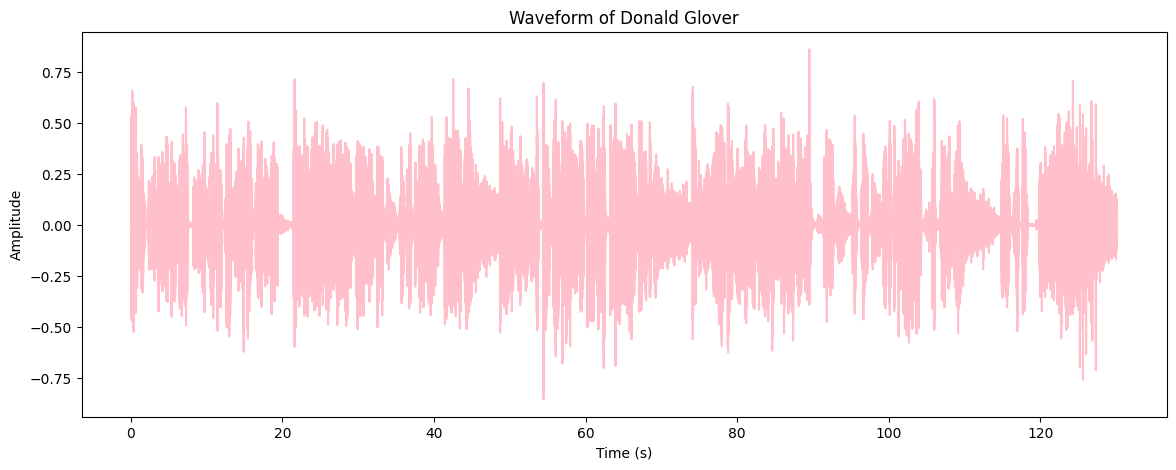

In [18]:
plot_mp3(dg_audio, "Donald Glover")

In [19]:
def plot_mp3_laugh_start(audio, name, laughter_map):
    data, sr = librosa.load(audio, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color="pink")
    for info in laughter_map.values():
        plt.axvline(x=info[0], color='blue', linestyle='--', linewidth=1)
        plt.axvline(x=info[1], color='red', linestyle='--', linewidth=1)

    plt.title(f"Waveform of {name} Transcript")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

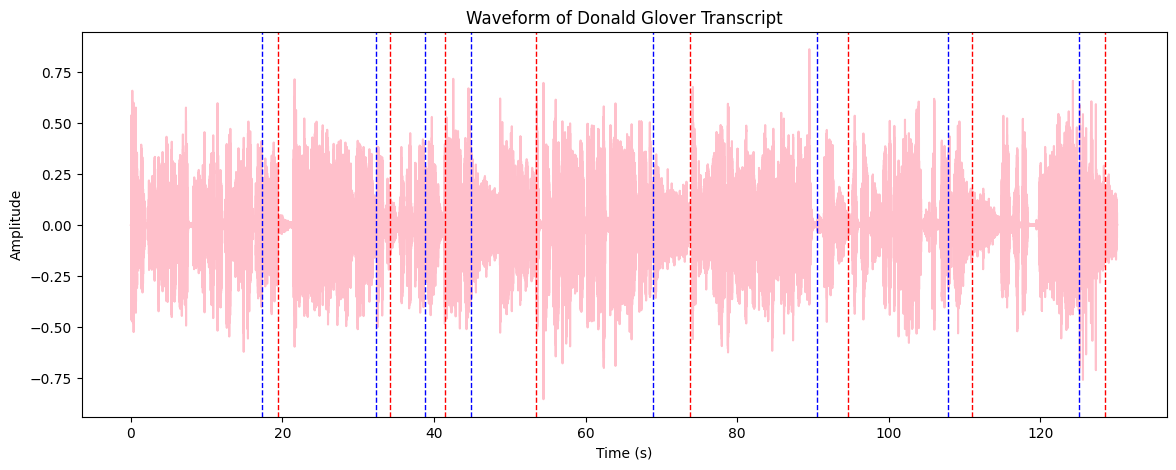

In [20]:
plot_mp3_laugh_start(dg_audio, "Donald Glover", dg_laughter_map)

In [21]:
def split_sentence(sentence, max_length=80):
    lines = []
    while len(sentence) > max_length:
        split_index = sentence.rfind(' ', 0, max_length)
        if split_index == -1:

            split_index = max_length
        lines.append(sentence[:split_index].strip())
        sentence = sentence[split_index:].strip()
    lines.append(sentence)
    return lines

def plot_mp3_laugh_sent(audio, name, laughter_map, sentences):
    data, sr = librosa.load(audio, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color="pink")

    for info in laughter_map.values():
        start = info[0]
        end = info[1]
        sentence = info[2]
        if start != list(laughter_map.keys())[-1]:
            lines = split_sentence(sentence)
            label_text = '\n'.join(lines)
            plt.text(start, np.min(data) - 0.1 * (np.max(data) - np.min(data)), label_text, rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=8)
        else:
            plt.text(start, np.min(data) - 0.1 * (np.max(data) - np.min(data)), sentence, rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=8)

        plt.axvline(x=start, color='blue', linestyle='--', linewidth=1)
        plt.axvline(x=end, color='green', linestyle=':', linewidth=1)

    plt.title(f"Waveform of {name} Transcript")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

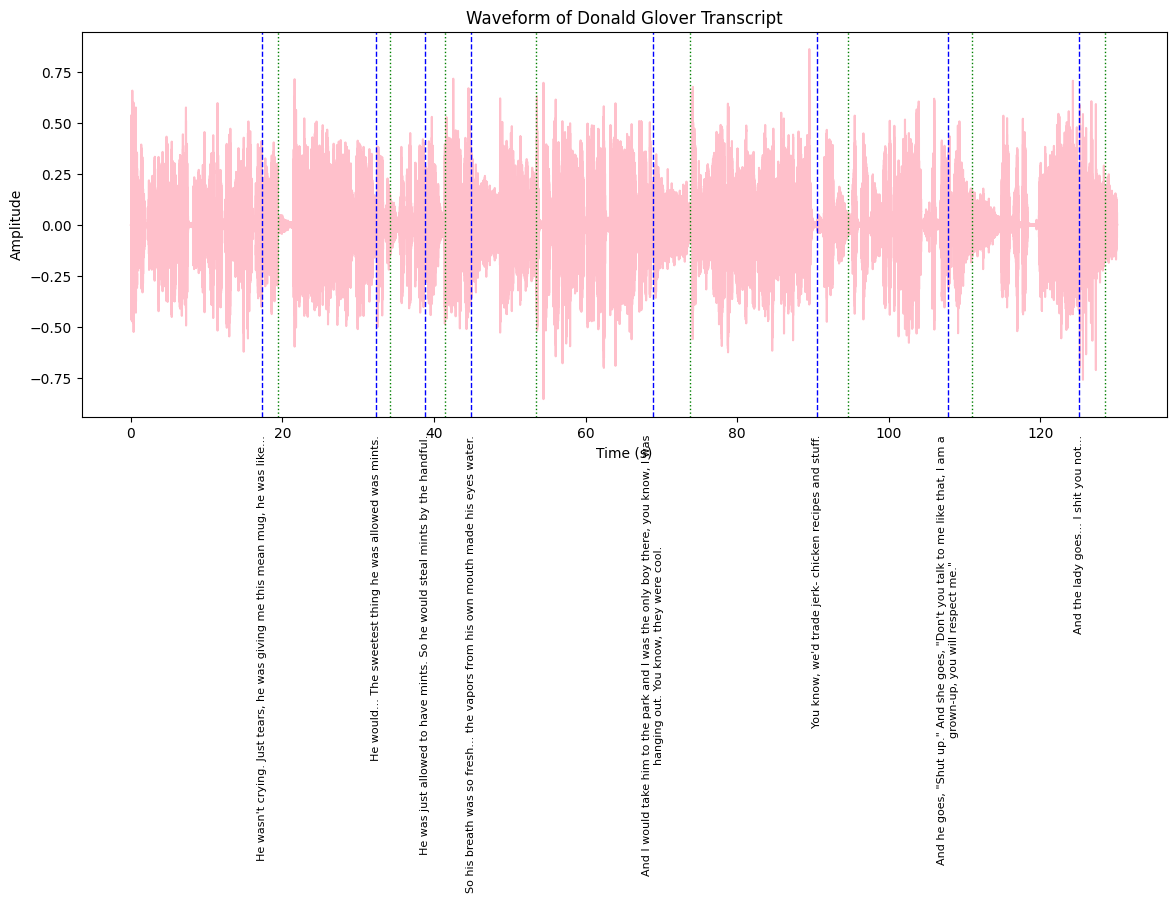

In [22]:
plot_mp3_laugh_sent(dg_audio, "Donald Glover", dg_laughter_map, sentences)

## Anthony Jeselnik

In [103]:
aj_laugh_times = {
    "laugh_1": {'start': 16.898, 'end': 19.405},
    "laugh_2": {'start': 29.085, 'end': 31.100},
    "laugh_3": {'start': 34.874, 'end': 36.233},
    "laugh_4": {'start': 43.756, 'end': 48.912},
    "laugh_5": {'start': 86.505, 'end': 88.497},
    "laugh_6": {'start': 93.982, 'end': 100.708},
    "laugh_7": {'start': 114.653, 'end': 120.278}
}

In [104]:
aj_laughter_map = create_laughter_map(aj_laugh_times, "/home/ada/humor/humor/stand_up_dataset/aj/aj_output.json")

for laugh_num, info in aj_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 16.898
End Time: 19.405
Funny Sentences: When I was a kid, I used to fantasize about getting older, growing up and having money, and buying my mom nice things for her birthday. When I was a kid, we were poor.

laugh 2
Start Time: 29.085
End Time: 31.1
Funny Sentences: Sold my passport on the street for 300 bucks to get to go to my prom. Of course this was before 9/11 so... my bad, everybody.

laugh 3
Start Time: 34.874
End Time: 36.233
Funny Sentences: Weird joke to clap for, but sure.

laugh 4
Start Time: 43.756
End Time: 48.912
Funny Sentences: My mom actually should've been on one of the planes that crashed on 9/11.

laugh 5
Start Time: 86.505
End Time: 88.497
Funny Sentences: And when I did that, my mom would act weird. She'd pull me aside and say, "Anthony, who's your new friend?

laugh 6
Start Time: 93.982
End Time: 100.708
Funny Sentences: And I would say, "Shut up, Mom, that's racist. Put your money away.

laugh 7
Start Time: 114.653
End Time: 120.278
Funny 

In [73]:
aj_sentences = make_sent_list(aj_laughter_map)
print(aj_sentences)

['When I was a kid, I used to fantasize about getting older, growing up and having money, and buying my mom nice things for her birthday. When I was a kid, we were poor.', 'Sold my passport on the street for 300 bucks to get to go to my prom. Of course this was before 9/11 so... my bad, everybody.', 'Weird joke to clap for, but sure.', "My mom actually should've been on one of the planes that crashed on 9/11.", 'And when I did that, my mom would act weird. She\'d pull me aside and say, "Anthony, who\'s your new friend?', 'And I would say, "Shut up, Mom, that\'s racist. Put your money away.', "And we never talk, write letters or any of that shit. 'Cause they're all in jail for the exact same thing."]


In [20]:
aj_audio = "/content/AJ_TP_audio_15.mp3"

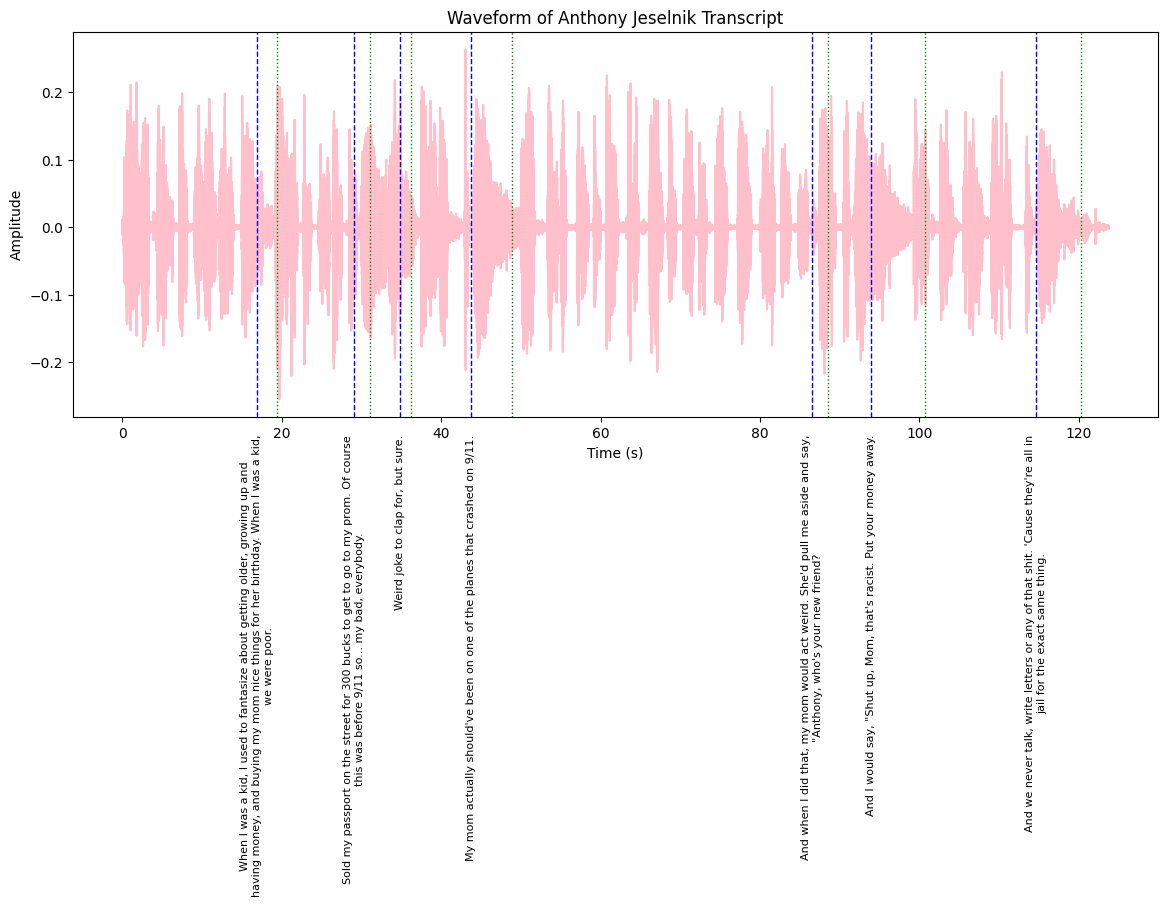

In [21]:
plot_mp3_laugh_sent(aj_audio, "Anthony Jeselnik", aj_laughter_map, aj_sentences)

Chelsea Peretti: One of the Greats

In [105]:
cp_laugh_times = {
    "laugh_1": {'start': 13.212, 'end': 18.877},
    "laugh_2": {'start': 24.966, 'end': 28.352},
    "laugh_3": {'start': 29.574, 'end': 32.654},
    "laugh_4": {'start': 59.008, 'end': 67.306},
    "laugh_5": {'start': 69.093, 'end': 72.455},
    "laugh_6": {'start': 74.383, 'end': 88.488}
}

In [106]:
cp_laughter_map = create_laughter_map(cp_laugh_times, "/home/ada/humor/humor/stand_up_dataset/cp/cp_output.json")

for laugh_num, info in cp_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 13.212
End Time: 18.877
Funny Sentences: It was a photoset of 500 photos. I'm not exaggerating.

laugh 2
Start Time: 24.966
End Time: 28.352
Funny Sentences: I'm just obsessed with the entire photoset. I'm just like, "Next, next, next, next, more, more, more, more."

laugh 3
Start Time: 59.008
End Time: 67.306
Funny Sentences: She calls him by a word that I really feel is one of the more disgusting words in the English language. She calls him her "hubby," which, to me is on par with the "N" word.

laugh 4
Start Time: 69.093
End Time: 72.455
Funny Sentences: My hubby fixed the door. My hubby is sleeping.

laugh 5
Start Time: 74.383
End Time: 88.488
Funny Sentences: He breathed in, he breathed out. He breathed in, he breathed out."



In [76]:
cp_sentences = make_sent_list(cp_laughter_map)
print(cp_sentences)

["It was a photoset of 500 photos. I'm not exaggerating.", 'I\'m just obsessed with the entire photoset. I\'m just like, "Next, next, next, next, more, more, more, more."', 'She calls him by a word that I really feel is one of the more disgusting words in the English language. She calls him her "hubby," which, to me is on par with the "N" word.', 'My hubby fixed the door. My hubby is sleeping.', 'He breathed in, he breathed out. He breathed in, he breathed out."']


In [26]:
cp_audio = "/content/CP_OTG_audio_18.mp3"

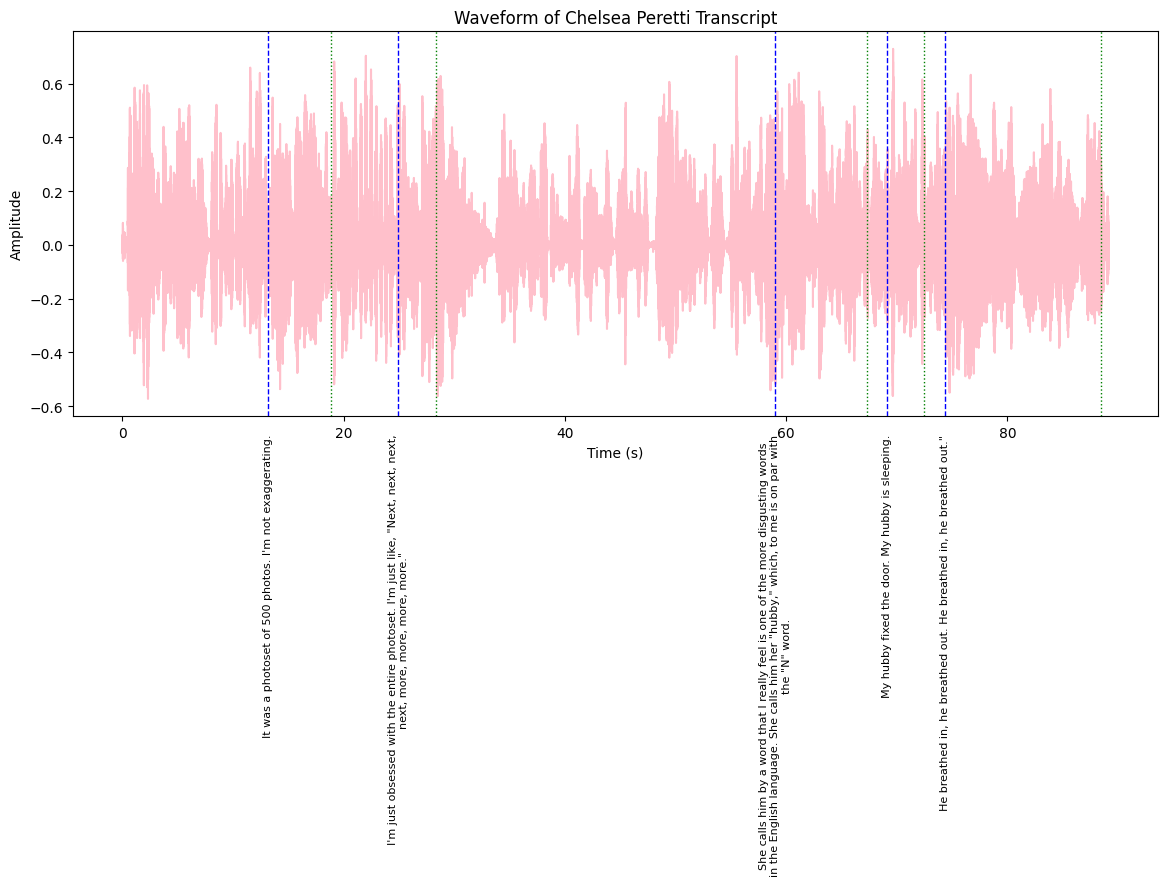

In [27]:
plot_mp3_laugh_sent(cp_audio, "Chelsea Peretti", cp_laughter_map, cp_sentences)

Louis C.K

In [107]:
lck_laugh_times = {
    "laugh_1": {'start': 3.206, 'end': 4.668},
    "laugh_2": {'start': 17.375, 'end': 20.770},
    "laugh_3": {'start': 31.709, 'end': 41.446},
    "laugh_4": {'start': 45.124, 'end': 48.943},
    "laugh_5": {'start': 49.344, 'end': 55.403},
    "laugh_6": {'start': 57.949, 'end': 64.031},
    "laugh_7": {'start': 65.540, 'end': 67.379}
}

In [108]:
lck_laughter_map = create_laughter_map(lck_laugh_times, "/home/ada/humor/humor/stand_up_dataset/lck/lck_output.json")

for laugh_num, info in lck_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 17.375
End Time: 20.77
Funny Sentences: Jesus was Jewish. And he said, "I don't think so."

laugh 2
Start Time: 31.709
End Time: 41.446
Funny Sentences: He was like, "Dude, Jesus couldn't be Jewish. Think about it."

laugh 3
Start Time: 45.124
End Time: 48.943
Funny Sentences: What was he? Catholic?

laugh 4
Start Time: 49.344
End Time: 55.403
Funny Sentences: Okay, Jesus was Catholic and he had a gold chain with a cross.

laugh 5
Start Time: 57.949
End Time: 64.031
Funny Sentences: "That finally makes sense. I didn't even know.

laugh 6
Start Time: 65.54
End Time: 67.379
Funny Sentences: Oh, fuck, that's me!



In [79]:
lck_sentences = make_sent_list(lck_laughter_map)
print(lck_sentences)

['Jesus was Jewish. And he said, "I don\'t think so."', 'He was like, "Dude, Jesus couldn\'t be Jewish. Think about it."', 'What was he? Catholic?', 'Okay, Jesus was Catholic and he had a gold chain with a cross.', '"That finally makes sense. I didn\'t even know.', "Oh, fuck, that's me!"]


In [32]:
lck_audio = "/content/LCK_SY_audio_06.mp3"

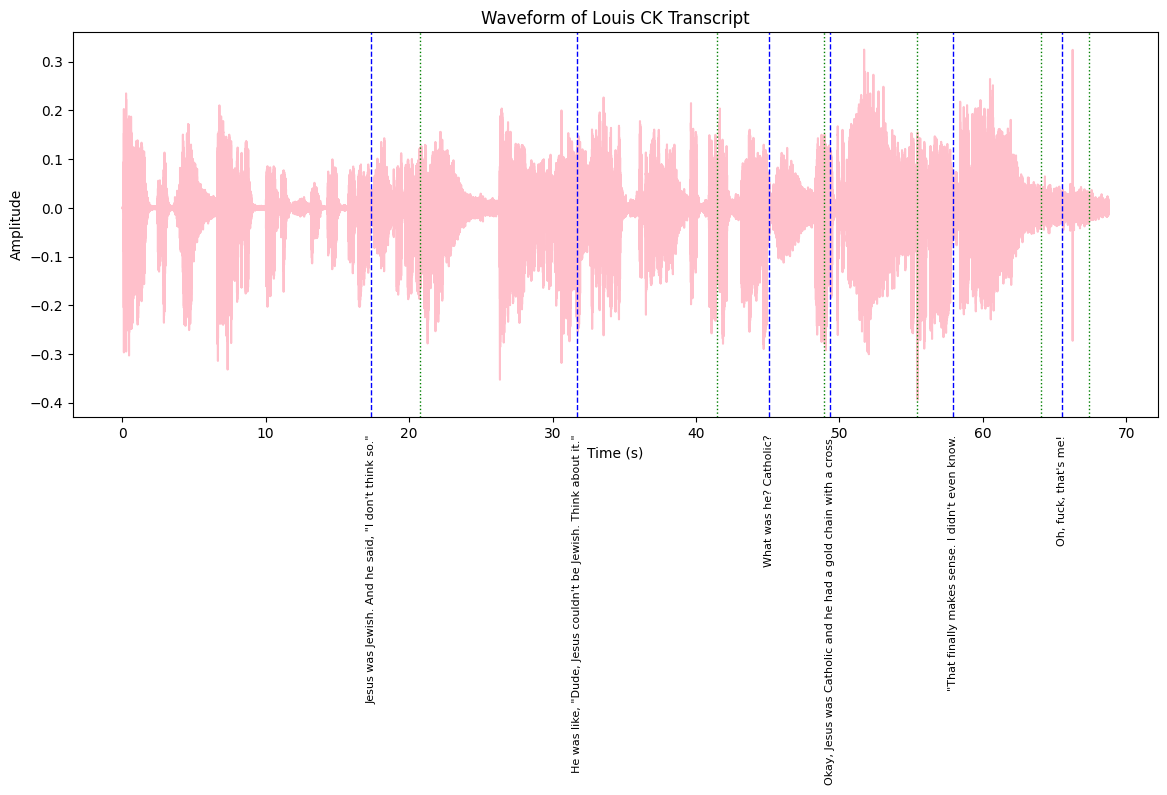

In [33]:
plot_mp3_laugh_sent(lck_audio, "Louis CK", lck_laughter_map, lck_sentences)

John Mulaney

In [60]:
jm_laugh_times = {
    "laugh_1": {'start': 1.968, 'end': 5.389},
    "laugh_1": {'start': 20.235, 'end': 22.628},
    "laugh_2": {'start': 30.546, 'end': 32.020},
    "laugh_3": {'start': 44.332, 'end': 46.485},
    "laugh_4": {'start': 59.492, 'end': 65.865},
    "laugh_5": {'start': 67.85, 'end': 70.762},
    "laugh_6": {'start': 73.527, 'end': 74.207},
    "laugh_7": {'start': 83.9075, 'end': 85.899},
    "laugh_8": {'start': 97.755, 'end': 105.980},
    "laugh_9": {'start': 113.782, 'end': 125.0765}
}

In [61]:
jm_laughter_map = create_laughter_map(jm_laugh_times, "/home/ada/humor/humor/stand_up_dataset/jm/jm_output.json")

for laugh_num, info in jm_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 20.235
End Time: 22.628
Funny Sentences: My wife and I just gave a bunch of stuff to Goodwill. We were moving apartments, we had a bunch of clothes and furniture, so we made a whole day out of it.

laugh 2
Start Time: 30.546
End Time: 32.02
Funny Sentences: And then one day my wife said, "Hey, you took that stuff to Goodwill, right?" And I said, "Of course I did!

laugh 3
Start Time: 44.332
End Time: 46.485
Funny Sentences: I was like, "This one's shirts. I got a bunch of shirts!

laugh 4
Start Time: 59.492
End Time: 65.865
Funny Sentences: He's like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?

laugh 5
Start Time: 67.85
End Time: 70.762
Funny Sentences: My mom said it could be a sleep shirt. Please deduct this from my 2017 income."

laugh 6
Start Time: 73.527
End Time: 74.207
Funny Sentences: That sleep shirt bullshit.

laugh 7
Start Time: 83.9075
End Time: 85.899
Funny Sentences: "Well, if it's too big you can just wear it

In [62]:
print(jm_laughter_map)

{'laugh 1': [20.235, 22.628, 'My wife and I just gave a bunch of stuff to Goodwill. We were moving apartments, we had a bunch of clothes and furniture, so we made a whole day out of it.'], 'laugh 2': [30.546, 32.02, 'And then one day my wife said, "Hey, you took that stuff to Goodwill, right?" And I said, "Of course I did!'], 'laugh 3': [44.332, 46.485, 'I was like, "This one\'s shirts. I got a bunch of shirts!'], 'laugh 4': [59.492, 65.865, 'He\'s like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?'], 'laugh 5': [67.85, 70.762, 'My mom said it could be a sleep shirt. Please deduct this from my 2017 income."'], 'laugh 6': [73.527, 74.207, 'That sleep shirt bullshit.'], 'laugh 7': [83.9075, 85.899, '"Well, if it\'s too big you can just wear it as a sleep shirt."'], 'laugh 8': [97.755, 105.98, '"Because we don\'t say that when someone gives us a gift because that would not be polite." Oh, I get it.'], 'laugh 9': [113.782, 125.0765, "So rather than 

In [63]:
jm_sentences = make_sent_list(jm_laughter_map)
print(jm_sentences)

['My wife and I just gave a bunch of stuff to Goodwill. We were moving apartments, we had a bunch of clothes and furniture, so we made a whole day out of it.', 'And then one day my wife said, "Hey, you took that stuff to Goodwill, right?" And I said, "Of course I did!', 'I was like, "This one\'s shirts. I got a bunch of shirts!', 'He\'s like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?', 'My mom said it could be a sleep shirt. Please deduct this from my 2017 income."', 'That sleep shirt bullshit.', '"Well, if it\'s too big you can just wear it as a sleep shirt."', '"Because we don\'t say that when someone gives us a gift because that would not be polite." Oh, I get it.', "So rather than violate these meaningless politeness rules, I'll just go to bed in a smock like goddamn Ebenezer Scrooge."]


In [66]:
jm_audio = "/home/ada/humor/humor/stand_up_dataset/jm/JM_KDRC_audio_12.mp3"

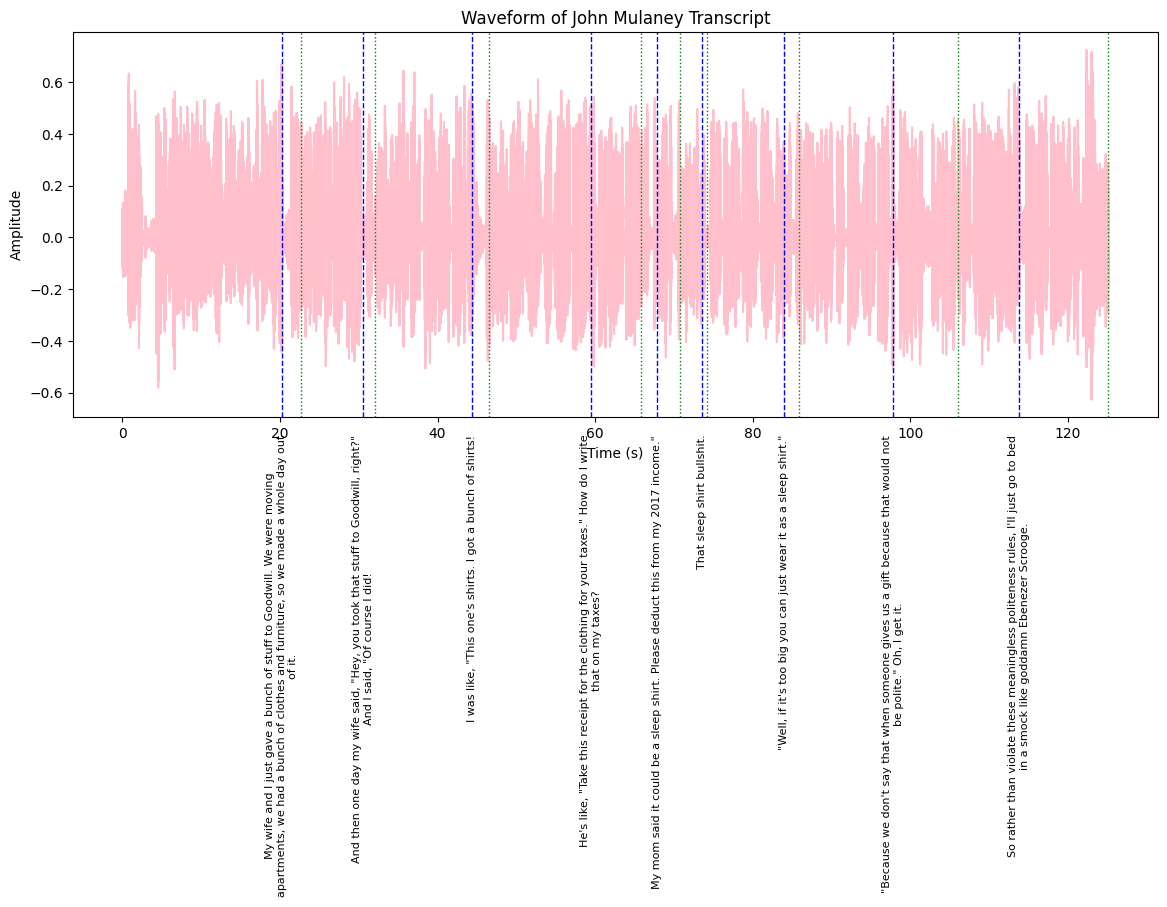

In [67]:
plot_mp3_laugh_sent(jm_audio, "John Mulaney", jm_laughter_map, jm_sentences)

# Other Transcripts

Anthony Jeselnik 2

In [109]:
aj2_laugh_times = {
    'laugh_1': {'start': 53.522, 'end': 57.255}, 
    'laugh_3': {'start': 78.781, 'end': 83.053}, 
    'laugh_4': {'start': 93.547, 'end': 96.904}, 
    }

In [111]:
aj2_laughter_map = create_laughter_map(aj2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/aj2/aj2_output.json")

for laugh_num, info in aj2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 53.522
End Time: 57.255
Funny Sentences: Like... Mark Twain out of my grandma's mouth, it would just come to life." And then I couldn't help myself.

laugh 2
Start Time: 78.781
End Time: 83.053
Funny Sentences: I said, "And I know my grandma loved it too, because it combined her two favorite things: spending time with her grandchildren, and using the 'N' word." Now I promise you...

laugh 3
Start Time: 93.547
End Time: 96.904
Funny Sentences: I am a real comedian. I am a pure comedian.



In [18]:
aj2_sentences = make_sent_list(aj2_laughter_map)
print(aj2_sentences)

['Like... Mark Twain out of my grandma\'s mouth, it would just come to life." And then I couldn\'t help myself.', 'I said, "And I know my grandma loved it too, because it combined her two favorite things: spending time with her grandchildren, and using the \'N\' word." Now I promise you...', 'I am a real comedian. I am a pure comedian.']


Ali Wong

In [112]:
aw_laugh_times = {
    'laugh_1': {'start': 21.007, 'end': 28.986}, 
    'laugh_2': {'start': 33.005, 'end': 37.756}, 
    'laugh_3': {'start': 48.803, 'end': 51.189}, 
    'laugh_4': {'start': 58.001, 'end': 69.002},  
    'laugh_5': {'start': 60.001, 'end': 61.762},    
    'laugh_6': {'start': 95.523, 'end': 98.684}, 
}

In [113]:
aw_laughter_map = create_laughter_map(aw_laugh_times, "/home/ada/humor/humor/stand_up_dataset/aw/aw_output.json")

for laugh_num, info in aw_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 21.007
End Time: 28.986
Funny Sentences: It was like the worst experience of my life. It was so emotional.

laugh 2
Start Time: 33.005
End Time: 37.756
Funny Sentences: We were screaming and fighting and yelling and it all came to a climax when she refused to let go of a Texas Instruments TI-82... manual. The manual.

laugh 3
Start Time: 48.803
End Time: 51.189
Funny Sentences: We were all required to buy it when we were in eight grade. It cost like $200.

laugh 4
Start Time: 58.001
End Time: 69.002
Funny Sentences: All because what? It could graph.

laugh 5
Start Time: 95.523
End Time: 98.684
Funny Sentences: I do know... that I'm gonna have to clean all this shit up when you die." "And I'm not trying to be a procrastinator anymore.



In [114]:
aw_sentences = make_sent_list(aw_laughter_map)
print(aw_sentences)

['It was like the worst experience of my life. It was so emotional.', 'We were screaming and fighting and yelling and it all came to a climax when she refused to let go of a Texas Instruments TI-82... manual. The manual.', 'We were all required to buy it when we were in eight grade. It cost like $200.', 'All because what? It could graph.', 'I do know... that I\'m gonna have to clean all this shit up when you die." "And I\'m not trying to be a procrastinator anymore.']


Ali Wong 2

In [115]:
aw2_laugh_times = {
    'laugh_1': {'start': 10.269, 'end': 12.379}, 
    'laugh_2': {'start': 40.632, 'end': 42.414}, 
    'laugh_3': {'start': 48.557, 'end': 50.081}, 
    'laugh_4': {'start': 63.2116, 'end': 65.0634}, 
    'laugh_5': {'start': 66.352, 'end': 68.18}, 
    'laugh_6': {'start': 92.823, 'end': 94.910}, 
    'laugh_7': {'start': 96.622, 'end': 98.919}, 
    'laugh_8': {'start': 117.020, 'end': 121.0765}
}

In [116]:
aw2_laughter_map = create_laughter_map(aw2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/aw2/aw2_output.json")

for laugh_num, info in aw2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

laugh 1
Start Time: 10.269
End Time: 12.379
Funny Sentences: I need to have children to keep me company when I get older. It's lonely.

laugh 2
Start Time: 40.632
End Time: 42.414
Funny Sentences: I'm just kidding. She doesn't have any black friends.

laugh 3
Start Time: 48.557
End Time: 50.081
Funny Sentences: Life is not Rush Hour, the movie, OK?

laugh 4
Start Time: 63.2116
End Time: 65.0634
Funny Sentences: I need children to be there for me when I'm older, when I get as old as her. And when I say be there for me, I mean pay for me when my husband isn't around to support me anymore.

laugh 5
Start Time: 66.352
End Time: 68.18
Funny Sentences: I'm not trying to be one of those old Chinese ladies who recycles for a living.

laugh 6
Start Time: 92.823
End Time: 94.91
Funny Sentences: Old Chinese ladies, they don't give a fuck. They got no shame.

laugh 7
Start Time: 96.622
End Time: 98.919
Funny Sentences: They're like, "I'm just gonna recycle... go bald... go to the park, do this shi

In [117]:
aw2_sentences = make_sent_list(aw2_laughter_map)
print(aw2_sentences)

["I need to have children to keep me company when I get older. It's lonely.", "I'm just kidding. She doesn't have any black friends.", 'Life is not Rush Hour, the movie, OK?', "I need children to be there for me when I'm older, when I get as old as her. And when I say be there for me, I mean pay for me when my husband isn't around to support me anymore.", "I'm not trying to be one of those old Chinese ladies who recycles for a living.", "Old Chinese ladies, they don't give a fuck. They got no shame.", 'They\'re like, "I\'m just gonna recycle... go bald... go to the park, do this shit."', "They wear that to protect themselves from their arch-nemesis, the sun. Their in a contest to see who's gonna burn out first."]


Chelsea Peretti 2

In [118]:
cp2_laugh_times = {
    'laugh_1': {'start': 15.0134, 'end': 21.524}, 
    'laugh_2': {'start': 29.9807, 'end': 34.641}, 
    'laugh_3': {'start': 38.318, 'end': 41.503}, 
    'laugh_4': {'start': 52.301, 'end': 61.693}, 
    'laugh_5.wav': {'start': 64.152, 'end': 72.795}, 
    'laugh_6.wav': {'start': 78.393, 'end': 99.004}, 
    'laugh_7.wav': {'start': 102.916, 'end': 107.811}, 
    'laugh_8.wav': {'start': 111.441, 'end': 113.994}, 
    'laugh_9.wav': {'start': 116.758, 'end': 128.516}, 
    'laugh_10.wav': {'start': 130.6942, 'end': 132.076}
}

cp2_laughter_map = create_laughter_map(cp2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/cp2/cp2_output.json")

for laugh_num, info in cp2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

cp2_sentences = make_sent_list(cp2_laughter_map)

laugh 1
Start Time: 15.0134
End Time: 21.524
Funny Sentences: If you really want to piss off a really hot girl, like a model-hot girl, go onto her social media, find a photo where she looks smoking hot, and you're just a regular girl. Go onto her comments and just be like, "People say I look just like you."

laugh 2
Start Time: 29.9807
End Time: 34.641
Funny Sentences: This is an actual thing. It's not to make them look youthful, you know.

laugh 3
Start Time: 38.318
End Time: 41.503
Funny Sentences: "Hi, everyone, same old me."

laugh 4
Start Time: 52.301
End Time: 61.693
Funny Sentences: But the reason I know about it is I met a girl who did it, and she was like, "It worked. I did stop sweating out of my armpits, but I started sweating out of my butthole."

laugh 5
Start Time: 64.152
End Time: 72.795
Funny Sentences: So, I'm... uh... Is that a good trade? like, kind of a deal with the devil.

laugh 6
Start Time: 78.393
End Time: 99.004
Funny Sentences: Then I'm imagining the guy that

Donald Glover 2

In [119]:
dg2_laugh_times = {
    'laugh_1': {'start': 20.288, 'end': 26.293}, 
    'laugh_2': {'start': 28.803, 'end': 35.910}, 
    'laugh_3': {'start': 40.953, 'end': 43.275}, 
    'laugh_4': {'start': 45.151, 'end': 46.488}, 
    'laugh_5': {'start': 49.068, 'end': 51.297}, 
    'laugh_6': {'start': 56.246, 'end': 71.937}, 
    'laugh_7': {'start': 77.121, 'end': 84.510}, 
    'laugh_8': {'start': 92.086, 'end': 93.329}, 
    'laugh_9': {'start': 96.542, 'end': 97.152}, 
    'laugh_10': {'start': 98.559, 'end': 104.658}, 
    'laugh_11': {'start': 108.207, 'end': 110.076}
}

dg2_laughter_map = create_laughter_map(dg2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/dg2/dg2_output.json")

for laugh_num, info in dg2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

dg2_sentences = make_sent_list(dg2_laughter_map)

laugh 1
Start Time: 20.288
End Time: 26.293
Funny Sentences: I was hanging out in my neighborhood and this girl was jogging and we started talking about a rape that had happened in the neighborhood, and we were talking about... "Oh, this is awful, this is so messed up. I can't believe this happened so close to us."

laugh 2
Start Time: 40.953
End Time: 43.275
Funny Sentences: "Yes, I will. I have no problem."

laugh 3
Start Time: 45.151
End Time: 46.488
Funny Sentences: Uh... Two things, lady.

laugh 4
Start Time: 49.068
End Time: 51.297
Funny Sentences: Number one, he's a rapist.

laugh 5
Start Time: 56.246
End Time: 71.937
Funny Sentences: It's probably pretty high. Number two... you can shit on command?

laugh 6
Start Time: 77.121
End Time: 84.51
Funny Sentences: That's amazing, okay? No, I can't poop whenever I want.

laugh 7
Start Time: 92.086
End Time: 93.329
Funny Sentences: Poop yourself right now!" I'd be like, "Blow my head off."

laugh 8
Start Time: 96.542
End Time: 97.152
F

Hasan Minhaj

In [120]:
hm_laugh_times = {
    'laugh_1': {'start': 10.0, 'end': 12.553}, 
    'laugh_2': {'start': 19.716, 'end': 25.960}, 
    'laugh_3': {'start': 35.217, 'end': 38.130}, 
    'laugh_5': {'start': 52.427, 'end': 54.516}, 
    'laugh_5': {'start': 59.617, 'end': 65.259},
    'laugh_6': {'start': 80.798, 'end': 90.037}
}

hm_laughter_map = create_laughter_map(hm_laugh_times, "/home/ada/humor/humor/stand_up_dataset/hm/hm_output.json")

for laugh_num, info in hm_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

hm_sentences = make_sent_list(hm_laughter_map)

laugh 1
Start Time: 10.0
End Time: 12.553
Funny Sentences: This is a real show about a white kid that gets slapped at a birthday party. Are you fucking kidding?

laugh 2
Start Time: 19.716
End Time: 25.96
Funny Sentences: Are you kidding me? Do you know when br0wn kids get slapped?

laugh 3
Start Time: 35.217
End Time: 38.13
Funny Sentences: We go, "Ah, Biju got slapped on his birthday!" And that's what makes us tough and resilient.

laugh 4
Start Time: 59.617
End Time: 65.259
Funny Sentences: [laughter] That kid won't choke on camera. He's been slapped on camera.Of course he can spell "knaidel".Knaidel.Look at that face.

laugh 5
Start Time: 80.798
End Time: 90.037
Funny Sentences: Look at his brother. His brother is like, "I'm fucked.



Hasan Minhaj 2

In [40]:
hm2_laugh_times = {
    'laugh_1': {'start': 21.149, 'end': 22.093}, 
    'laugh_2': {'start': 24.359, 'end': 26.564}, 
    'laugh_3': {'start': 43.435, 'end': 47.071}, 
    'laugh_4': {'start': 57.252, 'end': 59.076}
}

hm2_laughter_map = create_laughter_map(hm2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/hm2/hm2_output.json")

for laugh_num, info in hm2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

hm2_sentences = make_sent_list(hm2_laughter_map)

laugh 1
Start Time: 21.149
End Time: 22.093
Funny Sentences: "Alright, you guys are all killing it academically but I want you to know there is more to life than just getting into UC Berkeley." One kid was like, "I know, getting into Stanford."

laugh 2
Start Time: 43.435
End Time: 47.071
Funny Sentences: Us? Me, Jehovah's Witness girl, Korean exchange students, going to the prom?

laugh 3
Start Time: 57.252
End Time: 59.076
Funny Sentences: He's like, "Hanson, this is not funny." He walks over to the board, he pulls it down.



Iliza Shlesinger

In [44]:
is_laugh_times = {
    'laugh_1': {'start': 18.016, 'end': 19.682}, 
    'laugh_2': {'start': 27.0834, 'end': 29.953}, 
    'laugh_3.': {'start': 43.7608, 'end': 45.129}, 
    'laugh_4': {'start': 61.0096, 'end': 65.1855}, 
    'laugh_5': {'start': 70.899, 'end': 72.245}, 
    'laugh_5': {'start': 79.163, 'end': 87.773}, 
    'laugh_6': {'start': 108.979, 'end': 109.358},
    'laugh_7': {'start': 112.762, 'end': 115.738}
}

is_laughter_map = create_laughter_map(is_laugh_times, "/home/ada/humor/humor/stand_up_dataset/is/is_output.json")

for laugh_num, info in is_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

is_sentences = make_sent_list(is_laughter_map)

laugh 1
Start Time: 18.016
End Time: 19.682
Funny Sentences: And you start talking, maybe you have some drinks, maybe you dance, maybe you exchange numbers, maybe you start to date. Now, I happen to think the very beginning of a new relationship is the most exciting part of the relationship.

laugh 2
Start Time: 27.0834
End Time: 29.953
Funny Sentences: I don't know. I can't say empirically how fun being married is.

laugh 3
Start Time: 43.7608
End Time: 45.129
Funny Sentences: The beginning of a relationship is exciting because it's brand new. You're both on your best behavior, it's still electric, you're not totally sure about the history of mental illness in each family.

laugh 4
Start Time: 61.0096
End Time: 65.1855
Funny Sentences: You want him to come in and be, like, "It's so homey. I'd like to stay forever."

laugh 5
Start Time: 79.163
End Time: 87.773
Funny Sentences: That's your 20s. In your 30s...

laugh 6
Start Time: 108.979
End Time: 109.358
Funny Sentences: But it's inter

Iliza Shlesinger 2

In [47]:
is2_laugh_times = {
    'laugh_1': {'start': 9.735, 'end': 15.507}, 
    'laugh_2': {'start': 33.498, 'end': 35.787}, 
    'laugh_3': {'start': 77.430, 'end': 78.8497}, 
    'laugh_4': {'start': 99.696, 'end': 101.115}, 
    'laugh_6': {'start': 109.649, 'end': 113.476}
}

is2_laughter_map = create_laughter_map(is2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/is2/is2_output.json")

for laugh_num, info in is2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

is2_sentences = make_sent_list(is2_laughter_map)

laugh 1
Start Time: 9.735
End Time: 15.507
Funny Sentences: Don't want work clothes. You don't want to wear your daytime clothes, 'cause... 'cause it's nighttime.

laugh 2
Start Time: 33.498
End Time: 35.787
Funny Sentences: However, at the other end of the sartorial spectrum, you don't want to go, like, super hardcore sexy the first time a guy's coming over. Just relax.

laugh 3
Start Time: 77.43
End Time: 78.8497
Funny Sentences: This is less about that, and more about just being mentally kind to the other person. You show up in that, he'll be, like, "Oh, my god!"

laugh 4
Start Time: 99.696
End Time: 101.115
Funny Sentences: I got fired, and... I cried in front of everyone and...

laugh 5
Start Time: 109.649
End Time: 113.476
Funny Sentences: You're, like, "Yeah." He's, like, "Just kidding.



Jim Gaffigan

In [121]:
jg_laugh_times = {
    'laugh_1.wav': {'start': 17.846, 'end': 19.490}, 
    'laugh_2.wav': {'start': 28.813, 'end': 33.533}, 
    'laugh_3.wav': {'start': 36.351, 'end': 36.914}, 
    'laugh_4.wav': {'start': 53.493, 'end': 54.714}, 
    'laugh_5.wav': {'start': 68.968, 'end': 69.766}, 
    'laugh_6.wav': {'start': 73.665, 'end': 78.103}, 
    'laugh_7': {'start': 81.977, 'end': 84.889},
    'laugh_8': {'start': 87.472, 'end': 89.234}, 
    'laugh_9.wav': {'start': 91.676, 'end': 95.104}
}

jg_laughter_map = create_laughter_map(jg_laugh_times, "/home/ada/humor/humor/stand_up_dataset/jg/jg_output.json")

for laugh_num, info in jg_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jg_sentences = make_sent_list(jg_laughter_map)

laugh 1
Start Time: 17.846
End Time: 19.49
Funny Sentences: And suddenly I'm fat? That doesn't seem fair.

laugh 2
Start Time: 28.813
End Time: 33.533
Funny Sentences: And you can't use our bathroom." When I go out to eat, if I order a salad, the waiter's always like, "Aw.

laugh 3
Start Time: 36.351
End Time: 36.914
Funny Sentences: Look at you try."

laugh 4
Start Time: 53.493
End Time: 54.714
Funny Sentences: But now after shows people are like, "Good show." "You nailed it."

laugh 5
Start Time: 68.968
End Time: 69.766
Funny Sentences: I like to eat. You know, when you like to eat, what's weird is people assume you enjoy cooking.

laugh 6
Start Time: 73.665
End Time: 78.103
Funny Sentences: (audience laughs) Well, you must know your way around the kitchen.

laugh 7
Start Time: 81.977
End Time: 84.889
Funny Sentences: Well, you must love to cook. Look, I like to sleep.

laugh 8
Start Time: 87.472
End Time: 89.234
Funny Sentences: It doesn't mean I wanna build a bed.The truth is, I do

Jim Gaffigan 2

In [51]:
jg2_laugh_times = {
    'laugh_1.wav': {'start':11.892, 'end': 13.087}, 
    'laugh_2': {'start': 17.552, 'end': 20.834}, 
    'laugh_3.wav': {'start': 23.450, 'end': 25.588}, 
    'laugh_4': {'start': 30.350, 'end': 33.624}, 
    'laugh_5.wav': {'start': 40.250, 'end': 43.140}, 
    'laugh_6.wav': {'start': 51.553, 'end': 53.033}, 
    'laugh_7.wav': {'start': 60.988, 'end': 62.526}, 
    'laugh_8.wav': {'start': 64.0300, 'end': 67.672}, 
    'laugh_9.wav': {'start': 78.363, 'end': 79.672},
    'laugh_9.wav': {'start': 86.610, 'end': 88.263}
}

jg2_laughter_map = create_laughter_map(jg2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/jg2/jg2_output.json")

for laugh_num, info in jg2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jg_sentences = make_sent_list(jg2_laughter_map)

laugh 1
Start Time: 11.892
End Time: 13.087
Funny Sentences: Recently, I was invited to a surprise birthday party. It was a surprise birthday party for a dog.

laugh 2
Start Time: 17.552
End Time: 20.834
Funny Sentences: That's right, I have friends that are mentally ill.I went, I went.

laugh 3
Start Time: 30.35
End Time: 33.624
Funny Sentences: Didn't suspect a thing. Dog didn't know it was his birthday.

laugh 4
Start Time: 40.25
End Time: 43.14
Funny Sentences: The dog didn't know it had a birthday. The dog wasn't sure why people were in the apartment.

laugh 5
Start Time: 51.553
End Time: 53.033
Funny Sentences: Oh, one year equals seven for doggies? Okay.

laugh 6
Start Time: 60.988
End Time: 62.526
Funny Sentences: That's not fulfilling some dog need, you know? There's not a dog sitting in a bar right now going, "I'm not three, I'm 21!

laugh 7
Start Time: 86.61
End Time: 88.263
Funny Sentences: "You're back! It's a miracle!



Joe List

In [56]:
jl_laugh_times = {
    'laugh_1.wav': {'start': 7.456820622986036, 'end': 12.396670247046186}, 
    'laugh_2.wav': {'start': 12.84360902255639, 'end': 17.148335123523093}, 
    'laugh_3.wav': {'start': 25.922448979591834, 'end': 27.145649838882917}, 
    'laugh_4.wav': {'start': 45.33114930182599, 'end': 53.75026852846401}, 
    'laugh_5.wav': {'start': 56.52599355531686, 'end': 62.00687432867883}, 
    'laugh_6.wav': {'start': 78.84940923737915, 'end': 87.57647690655209}
}

jl_laughter_map = create_laughter_map(jl_laugh_times, "/home/ada/humor/humor/stand_up_dataset/ji/ji_output.json")

for laugh_num, info in jl_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jl_sentences = make_sent_list(jl_laughter_map)

laugh 1
Start Time: 7.456820622986036
End Time: 12.396670247046186
Funny Sentences: It's one doctor. He knows all three body parts.

laugh 2
Start Time: 12.84360902255639
End Time: 17.148335123523093
Funny Sentences: I was hoping it was three doctors saving money, by sharing a small office. He's like, "I'm Bill, this is Susan, and Ted.

laugh 3
Start Time: 25.922448979591834
End Time: 27.145649838882917
Funny Sentences: Yeah, it's frustrating. It's when you're ears ring, or buzz all the time.

laugh 4
Start Time: 45.33114930182599
End Time: 53.75026852846401
Funny Sentences: It's pronounced t-ah-n-i-tus." All caps.

laugh 5
Start Time: 56.52599355531686
End Time: 62.00687432867883
Funny Sentences: And then I was like, "Shit, now I don't know how to say this word." This gentlemen is a doctor, he seems very smart.

laugh 6
Start Time: 78.84940923737915
End Time: 87.57647690655209
Funny Sentences: "My hearing is great. "I hear everything, plus ringing, so.



Joe List 2

In [57]:
jl2_laugh_times = {
    'laugh_1': {'start': 11.196, 'end': 19.140}, 
    'laugh_2': {'start': 28.809, 'end': 35.656}, 
    'laugh3': {'start': 36.453, 'end': 40.128}, 
    'laugh4': {'start': 46.263, 'end': 47.570}, 
    'laugh5': {'start': 50.612, 'end': 53.391}, 
    'laugh6': {'start': 54.398, 'end': 59.154}, 
    'laugh7': {'start': 69.954, 'end': 72.391}, 
    'laugh8': {'start': 75.288, 'end': 77.264}, 
    'laugh9': {'start': 80.169, 'end': 85.352}, 
    'laugh10': {'start': 100.918, 'end': 105.650}, 
    'laugh11':{'start': 111.023, 'end': 114.877}, 
    'laugh12': {'start': 124.376, 'end': 128.828}, 
}

jl2_laughter_map = create_laughter_map(jl2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/ji2/ji2_output.json")

for laugh_num, info in jl2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jl2_sentences = make_sent_list(jl2_laughter_map)

laugh 1
Start Time: 11.196
End Time: 19.14
Funny Sentences: You feel better than everybody behind you, don't you? You can be in the second to last row.

laugh 2
Start Time: 28.809
End Time: 35.656
Funny Sentences: Am I a psycho or is that annoying? The whole flight he's like.

laugh 3
Start Time: 36.453
End Time: 40.128
Funny Sentences: [yawns] For like five hours.

laugh 4
Start Time: 46.263
End Time: 47.57
Funny Sentences: I was like, hope this guy passes away on the flight. First of all, you don't need to make a noise when you yawn.

laugh 5
Start Time: 50.612
End Time: 53.391
Funny Sentences: That's a decision, he's deciding to do that.

laugh 6
Start Time: 54.398
End Time: 59.154
Funny Sentences: It's like, if you were hungry on a plane, you were like, I'm hungry. Well you're all right?

laugh 7
Start Time: 69.954
End Time: 72.391
Funny Sentences: And they're like, I am, here's my entire life story. of how I came to be tired.

laugh 8
Start Time: 75.288
End Time: 77.264
Funny Sent

John Mulaney 2

In [122]:
jm2_laugh_times = {
    'laugh1': {'start': 10.28062055815566, 'end': 12.200918703414802}, 
    'laugh2': {'start': 26.673409603050786, 'end': 27.703813485872764}, 
    'laugh3': {'start': 33.62863581209915, 'end': 36.88377535101404}, 
    'laugh4': {'start': 46.69603050788698, 'end': 50.583463338533534}, 
    'laugh5': {'start': 53.112636505460216, 'end': 54.23671346853874}, 
    'laugh6': {'start': 57.679199167966715, 'end': 60.11469925463685}, 
    'laugh7': {'start': 61.66030507886982, 'end': 62.71412723175593}, 
    'laugh8': {'start': 76.74167100017334, 'end': 77.23345467152019}, 
    'laugh9': {'start': 84.6804645519154, 'end': 86.60076269717455}, 
    'laugh10': {'start': 101.23718148725948, 'end': 101.89289304905529}, 
    'laugh11': {'start': 107.60695094470445, 'end': 112.12667706708267}, 
    'laugh12': {'start': 115.59258103657479, 'end': 118.70721095510486}, 
    'laugh13': {'start': 120.72118218062054, 'end': 123.53137458831685}
}

jm2_laughter_map = create_laughter_map(jm2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/jm2/jm2_output.json")

for laugh_num, info in jm2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jm2_sentences = make_sent_list(jm2_laughter_map)

laugh 1
Start Time: 10.28062055815566
End Time: 12.200918703414802
Funny Sentences: The greatest assembly of them all, once a year, Stranger Danger.

laugh 2
Start Time: 26.673409603050786
End Time: 27.703813485872764
Funny Sentences: The Bruno Mars of assemblies. You are gathered together as a school and you are told never to talk to an adult that you don't know and you are told this by an adult that you don't know.

laugh 3
Start Time: 33.62863581209915
End Time: 36.88377535101404
Funny Sentences: We had the same Stranger Danger speaker every year when I was a kid, his name was Detective JJ Bittenbinder.

laugh 4
Start Time: 46.69603050788698
End Time: 50.583463338533534
Funny Sentences: He was from the Chicago Police Department. He was a child homicide expert and... -[audience is silent] -Oh, gee.

laugh 5
Start Time: 53.112636505460216
End Time: 54.23671346853874
Funny Sentences: [audience laughing] Very sorry, Radio City, did that make you uncomfortable?

laugh 6
Start Time: 57.67

Jimmy Yang

In [69]:
jy_laugh_times = {
    'laugh1': {'start': 4.723, 'end': 6.042}, 
    'laugh2': {'start': 15.145, 'end': 17.092}, 
    'laugh3': {'start': 25.1675, 'end': 27.876}, 
    'laugh4': {'start': 35.655, 'end': 36.360}, 
    'laugh5': {'start': 40.282, 'end': 41.856}, 
    'laugh6': {'start': 53.297, 'end': 57.367}, 
    'laugh7': {'start': 60.736, 'end': 62.175}, 
    'laugh7': {'start': 72.351, 'end': 76.204},
    'laugh6': {'start': 81.672, 'end': 83.525}, 
    'laugh8': {'start': 88.152, 'end': 89.044}
}

jy_laughter_map = create_laughter_map(jy_laugh_times, "/home/ada/humor/humor/stand_up_dataset/jy/jy_output.json")

for laugh_num, info in jy_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jy_sentences = make_sent_list(jy_laughter_map)

laugh 1
Start Time: 4.723
End Time: 6.042
Funny Sentences: Asian people, we don't need Tinder anymore. We just go to BTS concerts.

laugh 2
Start Time: 25.1675
End Time: 27.876
Funny Sentences: I think tall women are beautiful. But some of them like to wear heels.

laugh 3
Start Time: 35.655
End Time: 36.36
Funny Sentences: She's like, it makes my ass look better. I'm like, your ass is at my eye level right now.

laugh 4
Start Time: 40.282
End Time: 41.856
Funny Sentences: Neither of us look good, OK?

laugh 5
Start Time: 81.672
End Time: 83.525
Funny Sentences: I was frustrated. I had enough.

laugh 6
Start Time: 88.152
End Time: 89.044
Funny Sentences: So I just looked up at her, I was like, hey!



Jimmy Yang

In [131]:
jy2_laugh_times = {
    'laugh1': {'start': 28.42559627690518, 'end': 29.97865037812682}, 
    'laugh2': {'start': 38.37926119837115, 'end': 41.508900523560214}, 
    'laugh3': {'start': 53.25093077370565, 'end': 56.28644560791158}, 
    'laugh4': {'start': 66.42835951134381, 'end': 69.39328097731239}
}

jy2_laughter_map = create_laughter_map(jy2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/jy2/jy2_output.json")

for laugh_num, info in jy2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

jy2_sentences = make_sent_list(jy2_laughter_map)

laugh 1
Start Time: 28.42559627690518
End Time: 29.97865037812682
Funny Sentences: First of all, old Asian people, they don't watch TV. They judge the TV.

laugh 2
Start Time: 38.37926119837115
End Time: 41.508900523560214
Funny Sentences: This is like, I'm just sitting next to my dad on the couch, and he's wearing his, like, old Asian man costume, which is just a wife beater and tighty-whiteys.

laugh 3
Start Time: 53.25093077370565
End Time: 56.28644560791158
Funny Sentences: He's just sitting there, arms folded, judging the TV like-He's made some random noises around the house. Now whenever he sneezes, it's never just a sneeze.

laugh 4
Start Time: 66.42835951134381
End Time: 69.39328097731239
Funny Sentences: Oh! Ay, shit.Oh!



Louis_CK_2

In [124]:
lck2_laugh_times = {
    'laugh1' :{'start': 19.604329896907217, 'end': 31.159823269513993}, 
    'laugh2': {'start': 56.859617083946986, 'end': 57.33030927835052}, 
    'laugh3': {'start': 64.0376730486009, 'end': 65.28500736377026}, 
}

lck2_laughter_map = create_laughter_map(lck2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/lck2/lck2_output.json")

for laugh_num, info in lck2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

lck2_sentences = make_sent_list(lck2_laughter_map)

laugh 1
Start Time: 19.604329896907217
End Time: 31.159823269513993
Funny Sentences: It's sad how dumb they are. They're in our lives and they know nothing about what's happening.

laugh 2
Start Time: 56.859617083946986
End Time: 57.33030927835052
Funny Sentences: And then one of the times you throw the ball, the dog looks at you like, "I didn't see what happened. I'm sorry, I...

laugh 3
Start Time: 64.0376730486009
End Time: 65.28500736377026
Funny Sentences: So you point at the ball, "There it is, right there. It's right there."



Nate_Bargatze

In [125]:
nb_laugh_times = {
    'laugh1': {'start': 12.98894533139816, 'end': 16.958442186744072}, 
    'laugh2': {'start': 20.787010159651665, 'end': 23.300241896468307}, 
    'laugh3': {'start': 39.95333817126269, 'end': 41.33913884857281}, 
    'laugh4': {'start': 52.28461538461538, 'end': 55.0562167392356}, 
    'laugh5': {'start': 66.98819545234639, 'end': 74.99765360425737}, 
    'laugh6': {'start': 85.68476052249636, 'end': 90.49983067247217}, 
    'laugh7' :{'start': 95.1035074987905, 'end': 97.07651185292694}
}

nb_laughter_map = create_laughter_map(nb_laugh_times, "/home/ada/humor/humor/stand_up_dataset/nb/nb_output.json")

for laugh_num, info in nb_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

nb_sentences = make_sent_list(nb_laughter_map)

laugh 1
Start Time: 12.98894533139816
End Time: 16.958442186744072
Funny Sentences: So I have a daughter, and my daughter's name is Harper. So a lot of people ask, "Did you name her after Harper Lee, the author of To Kill a Mockingbird?"

laugh 2
Start Time: 20.787010159651665
End Time: 23.300241896468307
Funny Sentences: And, you know, I've never thought about an author a day in my life, so... That never occurred to me.

laugh 3
Start Time: 39.95333817126269
End Time: 41.33913884857281
Funny Sentences: And then, you could be like, "Is your house on fire?" I've never seen someone cry this much.

laugh 4
Start Time: 52.28461538461538
End Time: 55.0562167392356
Funny Sentences: You got to get these kids off... You don't want technology all the time. She just sits there on her iPad.

laugh 5
Start Time: 66.98819545234639
End Time: 74.99765360425737
Funny Sentences: "Click the links below, subscribe, leave a comment." None of this is anywhere but my phone.

laugh 6
Start Time: 85.684760522

Nate_Bargatze 2

In [72]:
nb2_laugh_times = {
    'laugh1': {'start': 10.171, 'end': 12.779}, 
    'laugh2': {'start': 15.292, 'end': 19.380},
    'laugh3': {'start': 25.393, 'end': 27.907}, 
    'laugh_4': {'start': 43.575, 'end': 46.371}, 
    'laugh5': {'start': 49.8712, 'end': 51.703}, 
    'laugh6': {'start': 58.881, 'end': 62.509}, 
    'laugh7': {'start': 67.865, 'end': 70.543}, 
    'laugh8': {'start': 90.537, 'end': 93.376}
}

nb2_laughter_map = create_laughter_map(nb2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/nb2/nb2_output.json")

for laugh_num, info in nb2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

nb_sentences = make_sent_list(nb2_laughter_map)

laugh 1
Start Time: 10.171
End Time: 12.779
Funny Sentences: First and second grade was awesome. Third grade, you're like, "Okay."

laugh 2
Start Time: 15.292
End Time: 19.38
Funny Sentences: They throw some stuff in, you're like, "Oh, all right. All right."

laugh 3
Start Time: 25.393
End Time: 27.907
Funny Sentences: It's a new math they invented, no heads up. Just give it to parents that never learned it.

laugh 4
Start Time: 43.575
End Time: 46.371
Funny Sentences: If you know it... If you don't know Common Core, it's just a new math.

laugh 5
Start Time: 49.8712
End Time: 51.703
Funny Sentences: And the goal of Common Core is to use one sheet of paper for every problem. You... You just want to keep breaking the problem down.

laugh 6
Start Time: 58.881
End Time: 62.509
Funny Sentences: As you break it down, old math gets in there and you're like, "Oh! Just do that at the top.

laugh 7
Start Time: 67.865
End Time: 70.543
Funny Sentences: It's not like old math isn't working. Old ma

Nate_Bargatze_TK

In [79]:
nb_tk_laugh_times = {
    'laugh1': {'start': 9.292, 'end': 11.846}, 
    'laugh2': {'start': 16.367, 'end': 22.782},
    'laugh3': {'start': 26.020, 'end': 27.421}, 
    'laugh4': {'start': 48.091, 'end': 50.253},
    'laugh6': {'start': 55.689, 'end': 59.162},
    'laugh7': {'start': 72.160, 'end': 74.112},
    'laugh8': {'start': 80.708, 'end': 83.245}
}

nb_tk_laughter_map = create_laughter_map(nb_tk_laugh_times, "/home/ada/humor/humor/stand_up_dataset/nb_tk/nbtk_output.json")

for laugh_num, info in nb_tk_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

nb_tk2_sentences = make_sent_list(nb_tk_laughter_map)

laugh 1
Start Time: 9.292
End Time: 11.846
Funny Sentences: My dad is a magician. He's done that my entire life.

laugh 2
Start Time: 16.367
End Time: 22.782
Funny Sentences: It goes clown, then magic. There's two steps.

laugh 3
Start Time: 26.02
End Time: 27.421
Funny Sentences: I was born, he was a clown. It was never weird to me.

laugh 4
Start Time: 48.091
End Time: 50.253
Funny Sentences: How else would he come home? And...

laugh 5
Start Time: 55.689
End Time: 59.162
Funny Sentences: The Easter Bunny was in the passenger seat. That's the first thing that I remember, to my life.

laugh 6
Start Time: 72.16
End Time: 74.112
Funny Sentences: The Easter Bunny head didn't fit in the car. Like, he couldn't sit normal, so his head was bent to the side.

laugh 7
Start Time: 80.708
End Time: 83.245
Funny Sentences: And I remember he had his seat belt on, and he's just like... and I was like... I like to think about all the other people that saw that.



Nate_Bargatze_TK_2

In [81]:
nb_tk2_laugh_times = {
    'laugh1': {'start': 13.984, 'end': 15.303},
    'laugh2': {'start': 24.249, 'end': 28.361},  
    'laugh3': {'start': 37.646, 'end': 39.765}, 
    'laugh4': {'start': 50.124, 'end': 51.042}, 
    'laugh5': {'start': 55.3513, 'end': 56.410}, 
    'laugh6': {'start': 64.180, 'end': 65.875},
    'laugh7': {'start': 70.216, 'end': 76.073},
}

nb_tk2_laughter_map = create_laughter_map(nb_tk2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/nb_tk2/nbtk2_output.json")

for laugh_num, info in nb_tk2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

nb_tk2_sentences = make_sent_list(nb_tk2_laughter_map)

laugh 1
Start Time: 13.984
End Time: 15.303
Funny Sentences: It was a real redneck affair. It was right outside Louisville, Kentucky, where my parents are from.

laugh 2
Start Time: 24.249
End Time: 28.361
Funny Sentences: And my cousin's name is Tuesday, which is a good start. The invitation said, "Tuesday's getting married, rehearsal's Friday, wedding's Saturday."

laugh 3
Start Time: 37.646
End Time: 39.765
Funny Sentences: I'm wildly overdressed. I look like I work there.

laugh 4
Start Time: 50.124
End Time: 51.042
Funny Sentences: He has his tuxedo jacket, pants, cummerbund, bowtie. No shirt.

laugh 5
Start Time: 64.18
End Time: 65.875
Funny Sentences: You know? He has a body that you're like, "Put your jacket on backwards.

laugh 6
Start Time: 70.216
End Time: 76.073
Funny Sentences: Yeah. Then you see his back, and you're like, "Oof.



Russell_Peters

In [84]:
rp_laugh_times = {
    'laugh1': {'start': 10.549, 'end': 11.106}, 
    'laugh2': {'start': 17.367, 'end': 18.713}, 
    'laugh3': {'start': 23.074, 'end': 23.734}, 
    'laugh4': {'start': 38.771, 'end': 41.336}, 
    'laugh5': {'start': 51.251, 'end': 54.234},
    'laugh7': {'start': 70.283, 'end': 71.202}
}

rp_laughter_map = create_laughter_map(rp_laugh_times, "/home/ada/humor/humor/stand_up_dataset/rp/rp_output.json")

for laugh_num, info in rp_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

rp_sentences = make_sent_list(rp_laughter_map)

laugh 1
Start Time: 10.549
End Time: 11.106
Funny Sentences: I go, what do you mean what else is wrong with me? He goes, look, you're a 48-year-old Indian man.

laugh 2
Start Time: 17.367
End Time: 18.713
Funny Sentences: I'm like, that's really fucking racist, but since you asked, I have acid reflux.

laugh 3
Start Time: 23.074
End Time: 23.734
Funny Sentences: I don't know. Does anybody else- who else has acid reflux in here?

laugh 4
Start Time: 38.771
End Time: 41.336
Funny Sentences: Because there is no way you can be Indian and not have fucking acid reflux. It's inevitable.

laugh 5
Start Time: 51.251
End Time: 54.234
Funny Sentences: Dad, I want to assure you I have no phagus in me. No, no, son, esophagus.

laugh 6
Start Time: 70.283
End Time: 71.202
Funny Sentences: You got it, don't you, yellow guy? You do, do you.



Russell_Peters 2

In [126]:
rp2_laugh_times = {
    'laugh1': {'start': 17.69572953736655, 'end': 19.65405693950178}, 
    'laugh2': {'start': 21.423629893238434, 'end': 23.42914590747331}, 
    'laugh3': {'start': 25.576227758007118, 'end': 27.227829181494663}, 
    'laugh4': {'start': 32.30060498220641, 'end': 38.151992882562276}, 
    'laugh5': {'start': 50.0435231316726, 'end': 51.12886120996441}, 
    'laugh6': {'start': 55.51740213523132, 'end': 57.66448398576512}, 
    'laugh7': {'start': 61.36879003558719, 'end': 64.76637010676157}
}

rp2_laughter_map = create_laughter_map(rp2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/rp2/rp2_output.json")

for laugh_num, info in rp2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

rp2_sentences = make_sent_list(rp2_laughter_map)

laugh 1
Start Time: 17.69572953736655
End Time: 19.65405693950178
Funny Sentences: But I started settling into the idea because I started thinking of names for identical twins. I was like, if I have twin girls- because you've got to have fun with the names.

laugh 2
Start Time: 21.423629893238434
End Time: 23.42914590747331
Funny Sentences: If I have twin girls, these are going to be my daughters, it's going to be Kate and Duplicate.

laugh 3
Start Time: 25.576227758007118
End Time: 27.227829181494663
Funny Sentences: These are my boys, it's Pete and Repeat.

laugh 4
Start Time: 32.30060498220641
End Time: 38.151992882562276
Funny Sentences: Identical twins, that's like bragging rights for you, you know I mean. That's your way of going, look.

laugh 5
Start Time: 50.0435231316726
End Time: 51.12886120996441
Funny Sentences: Look, look. Or because you're Punjabi, look at how good my junk they are.

laugh 6
Start Time: 55.51740213523132
End Time: 57.66448398576512
Funny Sentences: Looks 

Sam Morill

In [86]:
sm_laugh_times = {
    'l1': {'start': 9.583, 'end': 15.102}, 
    'l2': {'start': 21.481, 'end': 25.540}, 
    'l3': {'start': 28.657, 'end': 30.060}, 
    'l4': {'start': 43.711, 'end': 47.941}, 
    'l5': {'start': 51.8923, 'end': 53.855}, 
    'l6': {'start': 56.099, 'end': 57.642}, 
    'l7': {'start': 59.629, 'end': 64.210}, 
    'l8': {'start': 67.623, 'end': 68.021}, 
    'l9': {'start': 78.300, 'end': 80.526}, 
    'l10': {'start': 83.8923, 'end': 87.175}, 
    'l11': {'start': 107.6833, 'end': 109.114},
    'l12': {'start': 114.186, 'end': 115.612}, 
    'l13': {'start': 123.0456, 'end': 124.653}, 
    'l14': {'start': 128.258, 'end': 129.497}, 
    'l15': {'start': 130.736, 'end': 133.587}, 
    'l16': {'start': 135.364, 'end': 136.509}, 
    'l17': {'start': 140.389, 'end': 143.171}, 
    'l18': {'start': 160.609, 'end': 162.035}, 
    'l19': {'start': 166.172, 'end': 172.366}, 
    'l20': {'start': 178.233, 'end': 179.776}
}

sm_laughter_map = create_laughter_map(sm_laugh_times, "/home/ada/humor/humor/stand_up_dataset/sm/sm_output.json")

for laugh_num, info in sm_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

sm_sentences = make_sent_list(sm_laughter_map)

laugh 1
Start Time: 9.583
End Time: 15.102
Funny Sentences: I got roofied at a party in college by accident, but you know, it still counts. Obviously, it was an accident.

laugh 2
Start Time: 21.481
End Time: 25.54
Funny Sentences: That is male privilege right there, isn't it? I just told a room full of people I got roofied.

laugh 3
Start Time: 28.657
End Time: 30.06
Funny Sentences: I did not see one concerned face in here. Everyone in here is like I assume things worked out for you, and they did.

laugh 4
Start Time: 43.711
End Time: 47.941
Funny Sentences: And he gave me this hateful look, and I thought, why is this guy so mad at me? And then I chugged it, and I woke up the next morning, and I was like oh.

laugh 5
Start Time: 51.8923
End Time: 53.855
Funny Sentences: That guy's a sexual predator. And my friend said you ruined his night.

laugh 6
Start Time: 56.099
End Time: 57.642
Funny Sentences: And I was like, that's not how I want to think about it, you know?

laugh 7
Start Ti

Sam Morill 2

In [128]:
sm2_laugh_times = {
    'l1': {'start': 33.412824933687006, 'end': 36.803209549071624}, 
    'l2': {'start': 40.10006631299735, 'end': 43.25663129973476}, 
    'l3': {'start': 49.85034482758621, 'end': 55.50877984084881}, 
    'l4': {'start': 63.248209549071625, 'end': 64.65112732095491}, 
    'l5': {'start': 69.79515915119364, 'end': 70.47323607427056}, 
    'l6': {'start': 79.31161803713529, 'end': 80.69115384615385}, 
    'l7': {'start': 83.6840450928382, 'end': 85.62474801061009}, 
    'l8': {'start': 91.65729442970823, 'end': 94.6735676392573}, 
    'l9': {'start': 100.19171087533158, 'end': 102.55328912466845}, 
    'l10': {'start': 104.61090185676395, 'end': 106.3177851458886}, 
    'l11': {'start': 108.51568965517242, 'end': 110.08228116710876}, 
    'l12': {'start': 112.65429708222813, 'end': 116.27850132625996}, 
    'l13': {'start': 118.2659681697613, 'end': 122.35781167108755}, 
    'l14': {'start': 123.97116710875333, 'end': 127.26802387267907}, 
    'l15': {'start': 143.12099469496022, 'end': 143.56525198938994}, 
    'l16': {'start': 147.42327586206898, 'end': 149.78485411140585}, 
    'l17': {'start': 157.26708222811672, 'end': 166.058700265252}, 
    'l18': {'start': 169.49584880636607, 'end': 173.68122015915122}
}

sm2_laughter_map = create_laughter_map(sm2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/sm2/sm2_output.json")

for laugh_num, info in sm2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

sm2_sentences = make_sent_list(sm2_laughter_map)

laugh 1
Start Time: 33.412824933687006
End Time: 36.803209549071624
Funny Sentences: How 'bout this for like a casual smoker? A hot girl walks up to a guy in the bar and asks to bum a cigarette, and he goes, oh, I don't smoke.

laugh 2
Start Time: 40.10006631299735
End Time: 43.25663129973476
Funny Sentences: So then she goes outside and bums them from another guy, and they go home together and they fuck and that's the whole commercial.

laugh 3
Start Time: 49.85034482758621
End Time: 55.50877984084881
Funny Sentences: Marlboro: Just in Case. All right, I got some momentum.

laugh 4
Start Time: 63.248209549071625
End Time: 64.65112732095491
Funny Sentences: My friend just had one, and her boyfriend didn't contribute to the cost, which I thought was not cool, you know? She's going through it, yeah.

laugh 5
Start Time: 69.79515915119364
End Time: 70.47323607427056
Funny Sentences: That is how low the bar is. I'm like, guy should pay a little bit for the abortion, and women are like, he'

Trevor Noah

In [89]:
tn_laugh_times = {
    'l1': {'start': 28.251, 'end': 30.529}, 
    'l2': {'start': 37.232, 'end': 40.139}, 
    'l3': {'start': 64.336, 'end': 67.965}, 
    'l4': {'start': 75.587, 'end': 82.391}, 
    'l5': {'start': 84.612, 'end': 86.553}, 
    'l6': {'start': 90.690, 'end': 95.057}, 
    'l7': {'start': 101.726, 'end': 105.023}, 
    'l8': {'start': 174.178, 'end': 175.568}
}

tn_laughter_map = create_laughter_map(tn_laugh_times, "/home/ada/humor/humor/stand_up_dataset/tn/tn_output.json")

for laugh_num, info in tn_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

tn_sentences = make_sent_list(tn_laughter_map)

laugh 1
Start Time: 28.251
End Time: 30.529
Funny Sentences: I'll share this with you, I don't mind. I, uh- I'm not particularly comfortable in the house at night by myself.

laugh 2
Start Time: 37.232
End Time: 40.139
Funny Sentences: What I'm trying to say is I'm afraid of the dark. And I know it's stupid to be afraid of the dark, right?

laugh 3
Start Time: 64.336
End Time: 67.965
Funny Sentences: When I go to the bathroom, do I turn the lights on and lose my sleep? Or do I leave the lights off and shit myself?

laugh 4
Start Time: 75.587
End Time: 82.391
Funny Sentences: I never know which one to go with. But what I started doing now is I leave the lights off.

laugh 5
Start Time: 84.612
End Time: 86.553
Funny Sentences: It sounds crazy, but I feel safe. I feel like I'm the most dangerous thing in the night.

laugh 6
Start Time: 90.69
End Time: 95.057
Funny Sentences: You'll find me at three a.m., barefoot, walking to the toilet, like, "Yes. Big boy got to make a pee-pee.

laugh 7


Trevor Noah 2

In [93]:
tn2_laugh_times = {
    'l1': {'start': 13.273, 'end': 17.662}, 
    'l2': {'start': 26.474, 'end': 27.698}, 
    'l3': {'start': 38.852, 'end': 40.535}, 
    'l4': {'start': 49.724, 'end': 51.042}, 
    'l5': {'start': 60.423, 'end': 62.326}, 
    'l6': {'start': 74.216, 'end': 78.397}, 
}

tn2_laughter_map = create_laughter_map(tn2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/tn2/tn2_output.json")

for laugh_num, info in tn2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

tn2_sentences = make_sent_list(tn2_laughter_map)

laugh 1
Start Time: 13.273
End Time: 17.662
Funny Sentences: You can't do normal things with that voice. You are destined for greatness.

laugh 2
Start Time: 26.474
End Time: 27.698
Funny Sentences: "Who the hell is this?!" "I'm not telling you."

laugh 3
Start Time: 38.852
End Time: 40.535
Funny Sentences: [laughs] It just doesn't work. I remember when Nelson Mandela was still alive, and he would tell jokes at press conferences and events, and no one would laugh.

laugh 4
Start Time: 49.724
End Time: 51.042
Funny Sentences: He still kept what was him. It was partly because of that voice.

laugh 5
Start Time: 60.423
End Time: 62.326
Funny Sentences: People would be like, "Let him in. Let him in!"

laugh 6
Start Time: 74.216
End Time: 78.397
Funny Sentences: Who's here? Who are we?'



Tom Segura

In [96]:
ts_laugh_times = {
    'l1':{'start': 11.892, 'end': 12.529}, 
    'l1':{'start': 15.496, 'end': 18.245}, 
    'l1':{'start': 22.420, 'end': 25.351}, 
    'l2':{'start': 31.113, 'end': 32.456}, 
    'l3': {'start': 43.950, 'end': 46.023}, 
    'l4': {'start': 56.503, 'end': 58.176},
    'l5': {'start': 61.4021, 'end': 63.451}
}

ts_laughter_map = create_laughter_map(ts_laugh_times, "/home/ada/humor/humor/stand_up_dataset/ts/ts_output.json")

for laugh_num, info in ts_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

ts_sentences = make_sent_list(ts_laughter_map)

laugh 1
Start Time: 22.42
End Time: 25.351
Funny Sentences: I just walked up to that shit, 15. This dude's like, "You trying to get a sack?"

laugh 2
Start Time: 31.113
End Time: 32.456
Funny Sentences: Cool." And he goes, "We just need to go get it."

laugh 3
Start Time: 43.95
End Time: 46.023
Funny Sentences: He goes, "I'll go get it. You stay here and watch my place."

laugh 4
Start Time: 56.503
End Time: 58.176
Funny Sentences: Anybody comes in here, blast 'em." Inside?

laugh 5
Start Time: 61.4021
End Time: 63.451
Funny Sentences: Paralysis. But what I said was, "That's what's up."



Tom Segura 2

In [101]:
ts2_laugh_times = {
    'l1': {'start': 7.912, 'end': 9.966}, 
    'l2': {'start': 17.212, 'end': 19.496}, 
    'l1': {'start': 44.776, 'end': 47.440}, 
    'l2': {'start': 50.788, 'end': 53.995}, 
    'l3': {'start': 58.970, 'end': 60.597}
}

ts2_laughter_map = create_laughter_map(ts2_laugh_times, "/home/ada/humor/humor/stand_up_dataset/ts2/ts2_output.json")

for laugh_num, info in ts2_laughter_map.items():
    print(laugh_num)
    print("Start Time:", info[0])
    print("End Time:", info[1])
    print("Funny Sentences:", info[2])
    print()

ts2_sentences = make_sent_list(ts2_laughter_map)

laugh 1
Start Time: 44.776
End Time: 47.44
Funny Sentences: And you can watch people walk up and be like, "Mm-mm." -And you hit that.

laugh 2
Start Time: 50.788
End Time: 53.995
Funny Sentences: And then you see it close, and you're like...

laugh 3
Start Time: 58.97
End Time: 60.597
Funny Sentences: Sometimes, a second later it opens, and you're like, "Fuck!" You get nervous energy, like you're a kid.



## Create Pandas Data

In [129]:
import pandas as pd

In [132]:
combined_data = {}
i = 1
for comedian, info in [("Donald_Glover", dg_laughter_map), ("Donald_Glover_2", dg2_laughter_map), 
                       ("Anthony_Jeselnik", aj_laughter_map), ("Anthony_Jeselnik_2", aj2_laughter_map),
                       ("Chelsea_Peretti", cp_laughter_map), ("Chelsea_Peretti_2", cp2_laughter_map),
                       ("Louis_CK", lck_laughter_map), ("Louis_CK_2", lck2_laughter_map), 
                       ("John_Mulaney", jm_laughter_map), ("John_Mulaney_2", jm2_laughter_map),
                       ("Ali_Wong", aw_laughter_map), ("Ali_Wong_2", aw2_laughter_map),
                       ("Hasan_Minhaj", hm_laughter_map), ("Hasan_Minhaj_2", hm2_laughter_map),
                       ("Iliza_Shlesinger", is_laughter_map), ("Iliza_Shlesinger_2", is2_laughter_map),
                       ("Jim_Gaffigan", jg_laughter_map), ("Jim_Gaffigan_2", jg2_laughter_map),
                       ("Joe_List", jl_laughter_map), ("Joe_List_2", jl2_laughter_map),
                       ("Jimmy_Yang", jy_laughter_map), ("Jimmy_Yang_2", jy2_laughter_map),
                       ("Nate_Bargatze", nb_laughter_map), ("Nate_Bargatze_2", nb2_laughter_map),
                       ("Nate_Bargatze_TK", nb_tk_laughter_map), ("Nate_Bargatze_TK_2", nb_tk2_laughter_map),
                       ("Russell_Peters", rp_laughter_map), ("Russell_Peters_2", rp2_laughter_map),
                       ("Sam_Morril", sm_laughter_map), ("Sam_Morril_2", sm2_laughter_map),
                       ("Trevor_Noah", tn_laughter_map), ("Trevor_Noah_2", tn2_laughter_map),
                       ("Tom_Segura", ts_laughter_map), ("Tom_Segura_2", ts2_laughter_map)]:
  for key, value in info.items():
    combined_data[i] = [comedian, value[0], value[1], value[2]]
    i+=1

In [133]:
for key, value in combined_data.items():
  print(key, value)

1 ['Donald_Glover', 17.268, 19.352, "He wasn't crying. Just tears, he was giving me this mean mug, he was like..."]
2 ['Donald_Glover', 32.292, 34.182, 'He would... The sweetest thing he was allowed was mints.']
3 ['Donald_Glover', 38.79, 41.441, 'He was just allowed to have mints. So he would steal mints by the handful.']
4 ['Donald_Glover', 44.903, 53.441, 'So his breath was so fresh... the vapors from his own mouth made his eyes water.']
5 ['Donald_Glover', 68.88, 73.824, 'And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool.']
6 ['Donald_Glover', 90.491, 94.607, "You know, we'd trade jerk- chicken recipes and stuff."]
7 ['Donald_Glover', 107.842, 110.958, 'And he goes, "Shut up." And she goes, "Don\'t you talk to me like that, I am a grown-up, you will respect me."']
8 ['Donald_Glover', 125.042, 128.508, 'And the lady goes... I shit you not...']
9 ['Donald_Glover_2', 20.288, 26.293, 'I was hanging out in my neighborhoo

In [134]:
stand_up_data = pd.DataFrame(list(combined_data.values()), columns=['comedian', 'laugh_start', 'laugh_end', 'sentence'])
print(stand_up_data)

          comedian  laugh_start  laugh_end  \
0    Donald_Glover      17.2680     19.352   
1    Donald_Glover      32.2920     34.182   
2    Donald_Glover      38.7900     41.441   
3    Donald_Glover      44.9030     53.441   
4    Donald_Glover      68.8800     73.824   
..             ...          ...        ...   
241     Tom_Segura      56.5030     58.176   
242     Tom_Segura      61.4021     63.451   
243   Tom_Segura_2      44.7760     47.440   
244   Tom_Segura_2      50.7880     53.995   
245   Tom_Segura_2      58.9700     60.597   

                                              sentence  
0    He wasn't crying. Just tears, he was giving me...  
1    He would... The sweetest thing he was allowed ...  
2    He was just allowed to have mints. So he would...  
3    So his breath was so fresh... the vapors from ...  
4    And I would take him to the park and I was the...  
..                                                 ...  
241         Anybody comes in here, blast 'em." I

In [135]:
stand_up_data.to_csv('/home/ada/humor/humor/stand_up_dataset/standup_data.csv', index=False)

Mute all audio but laughter

In [11]:
!pip install pydub

In [23]:
from pydub import AudioSegment

In [24]:
def create_silence(duration):
    return AudioSegment.silent(duration=duration)

def create_nonlaughter_audio(input_audio, laugh_times):
    audio = AudioSegment.from_file(input_audio, format="mp3")
    silent_audio = AudioSegment.empty()
    last_end_time = 0
    for laugh in laugh_times.values():
        start = int(laugh['start'] * 1000)
        end = int(laugh['end'] * 1000)
        if start < 0:
            start = 0
        if start > last_end_time:
            silent_audio += create_silence(start - last_end_time)
        laughter_segment = audio[start:end]
        silent_audio += laughter_segment
        last_end_time = end

    if last_end_time < len(audio):
        silent_audio += create_silence(len(audio) - last_end_time)

    return silent_audio



In [25]:
dg_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/dg/DG_W_audio_11.mp3", dg_laugh_times)

In [26]:
def plot_muted_audio(muted_audio):
    audio_data = np.array(muted_audio.get_array_of_samples())

    sample_rate = muted_audio.frame_rate
    time_axis = np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data))

    plt.figure(figsize=(14, 5))
    plt.plot(time_axis, audio_data, color='pink')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Muted Audio Waveform')
    plt.grid(True)
    plt.show()

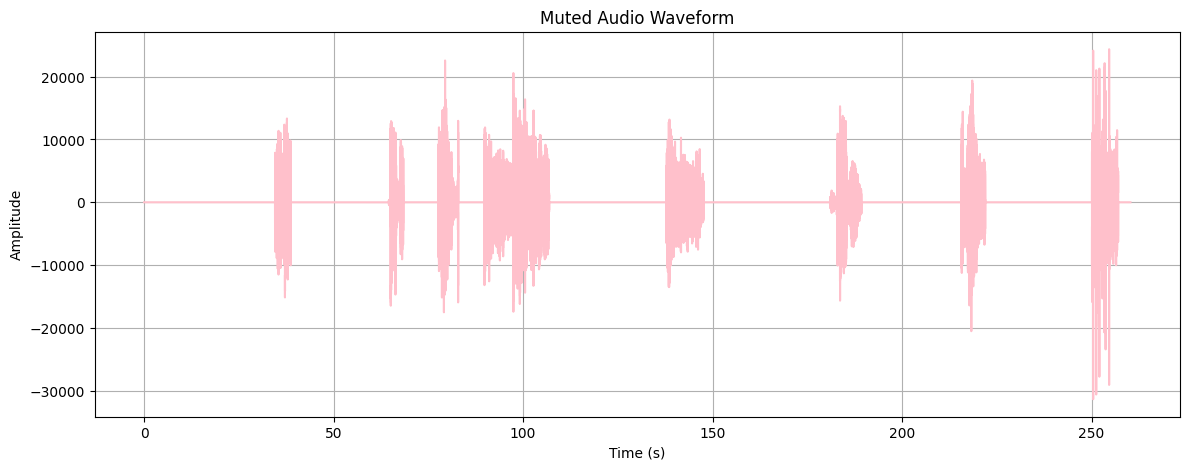

In [27]:
plot_muted_audio(dg_muted_audio)

In [28]:
dg_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/dg/dg_muted_output.mp3", format="mp3")

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/dg/dg_muted_output.mp3'>

In [ ]:
aj_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aj/AJ_TP_audio_15.mp3", aj_laugh_times)

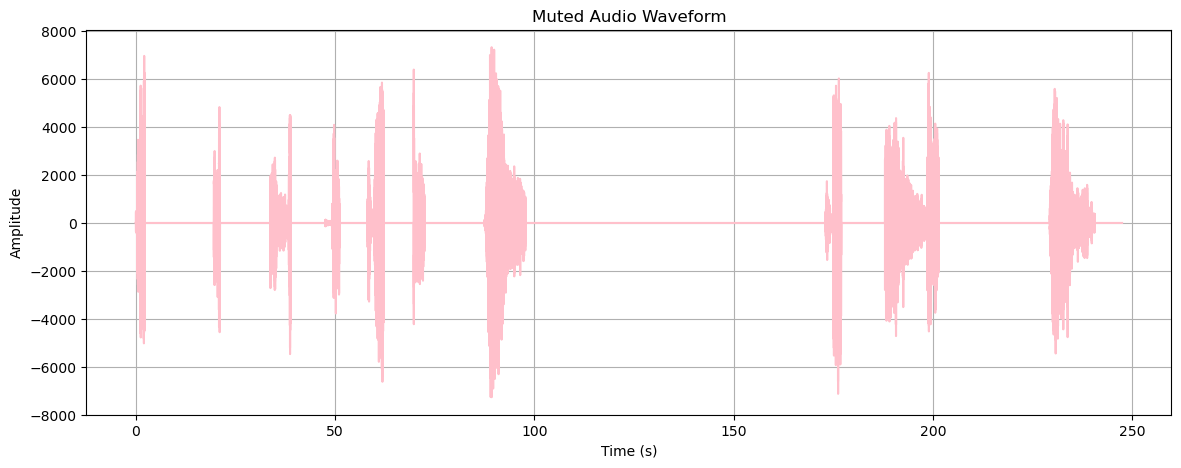

In [ ]:
plot_muted_audio(aj_muted_audio)

In [ ]:
aj_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aj/aj_muted_output.mp3", format="mp3")

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aj/aj_muted_output.mp3'>

In [ ]:
cp_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/cp/CP_OTG_audio_18.mp3", cp_laugh_times)

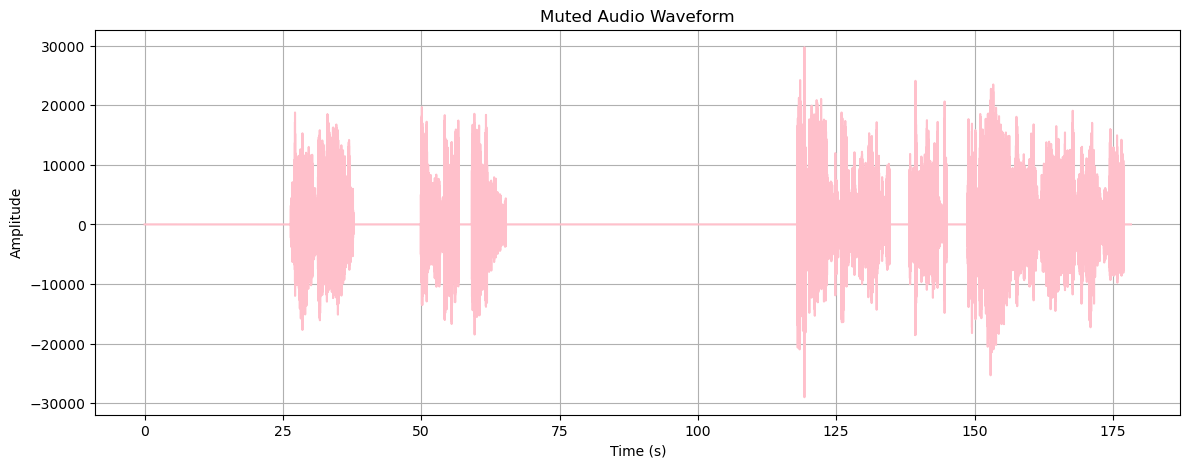

In [ ]:
plot_muted_audio(cp_muted_audio)

In [ ]:
cp_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/cp/cp_muted_output.mp3", format="mp3")

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/cp/cp_muted_output.mp3'>

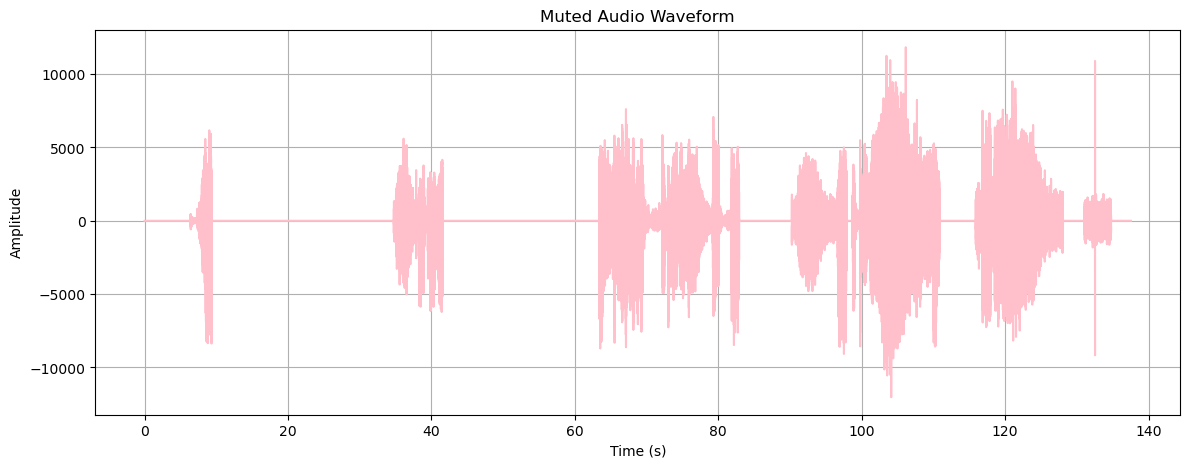

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/lck/lck_muted_output.mp3'>

In [ ]:
lck_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/lck/LCK_SY_audio_06.mp3", lck_laugh_times)
plot_muted_audio(lck_muted_audio)
lck_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/lck/lck_muted_output.mp3", format="mp3")

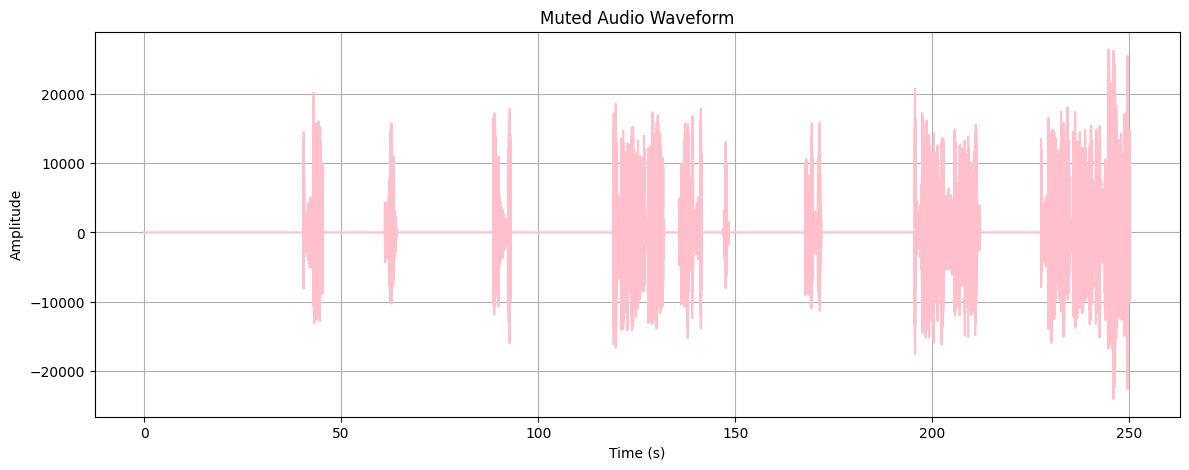

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/jm/jm_muted_output.mp3'>

In [68]:
jm_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/jm/JM_KDRC_audio_12.mp3", jm_laugh_times)
plot_muted_audio(jm_muted_audio)
jm_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/jm/jm_muted_output.mp3", format="mp3")

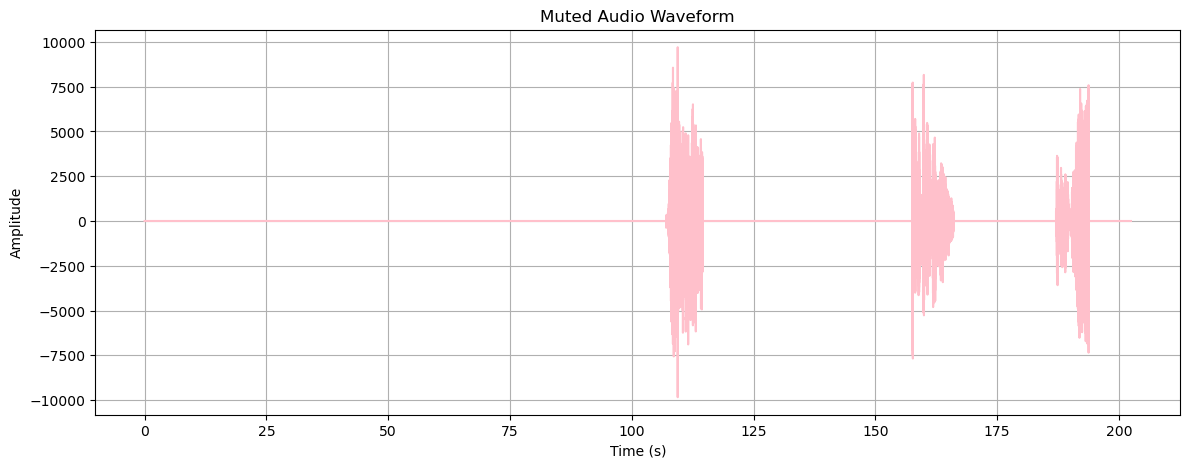

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ2_TP_muted_audio.mp3'>

In [16]:
aj2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ_TP_audio_25.mp3", aj2_laugh_times)
plot_muted_audio(aj2_muted_audio)
aj2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ2_TP_muted_audio.mp3", format="mp3")

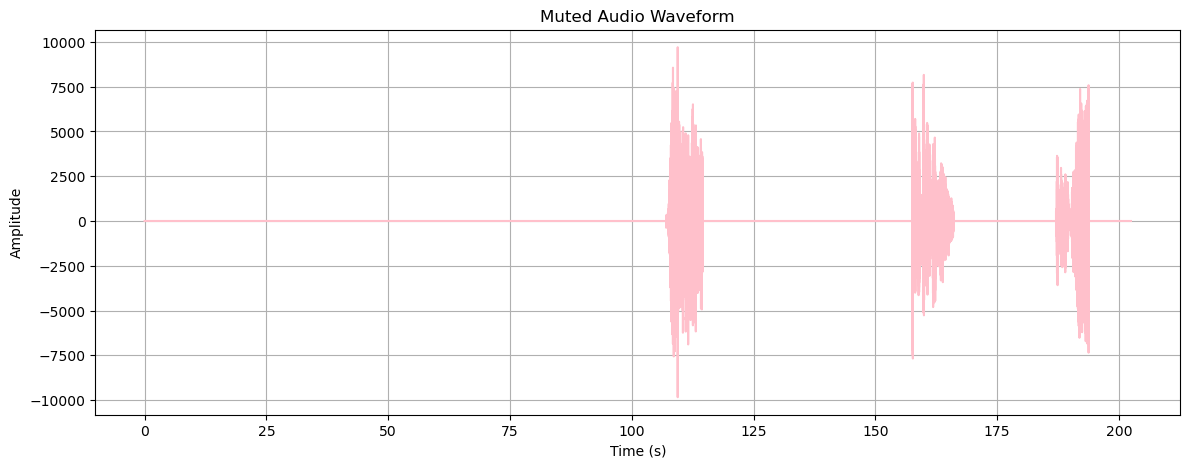

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ2_TP_muted_audio.mp3'>

In [26]:
aj2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ_TP_audio_25.mp3", aj2_laugh_times)
plot_muted_audio(aj2_muted_audio)
aj2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aj2/AJ2_TP_muted_audio.mp3", format="mp3")

In [20]:
import numpy as np

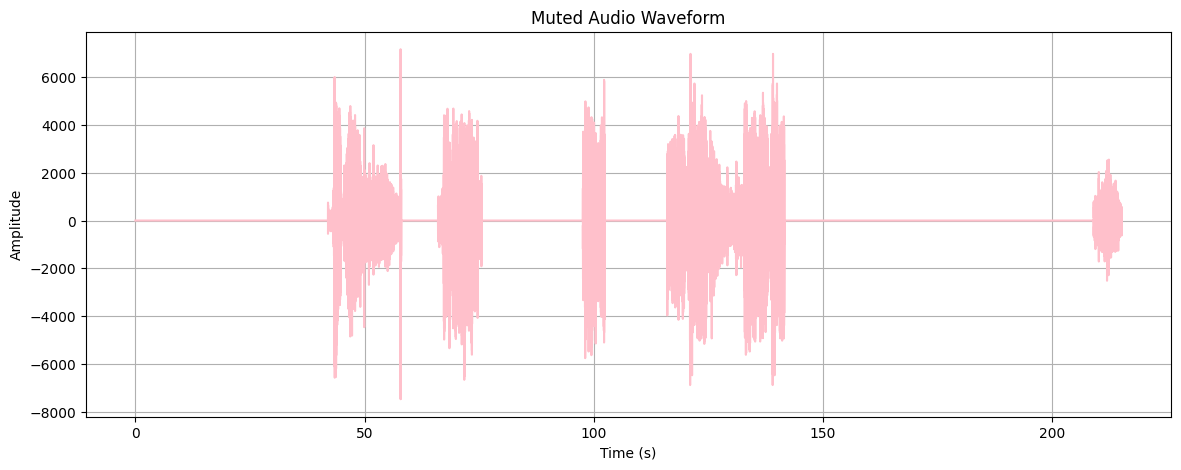

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/aw/aw_muted_audio.mp3'>

In [23]:
aw_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/aw/AW_BC_audio_04.mp3", aw_laugh_times)
plot_muted_audio(aw_muted_audio)
aw_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/aw/aw_muted_audio.mp3", format="mp3")

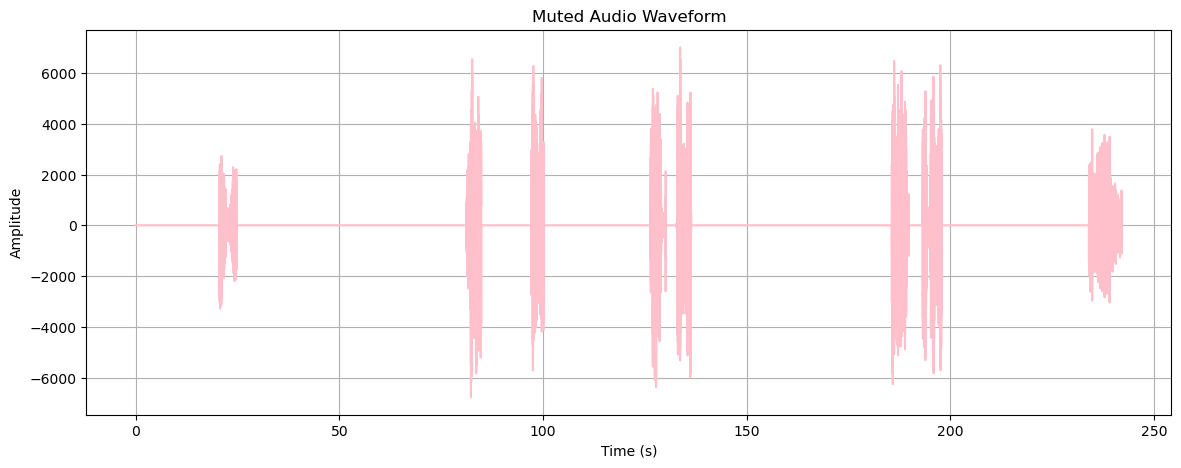

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/aw2/aw2_muted_audio.mp3'>

In [32]:
aw2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/aw2/AW_BC_audio_25.mp3", aw2_laugh_times)
plot_muted_audio(aw2_muted_audio)
aw2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/aw2/aw2_muted_audio.mp3", format="mp3")

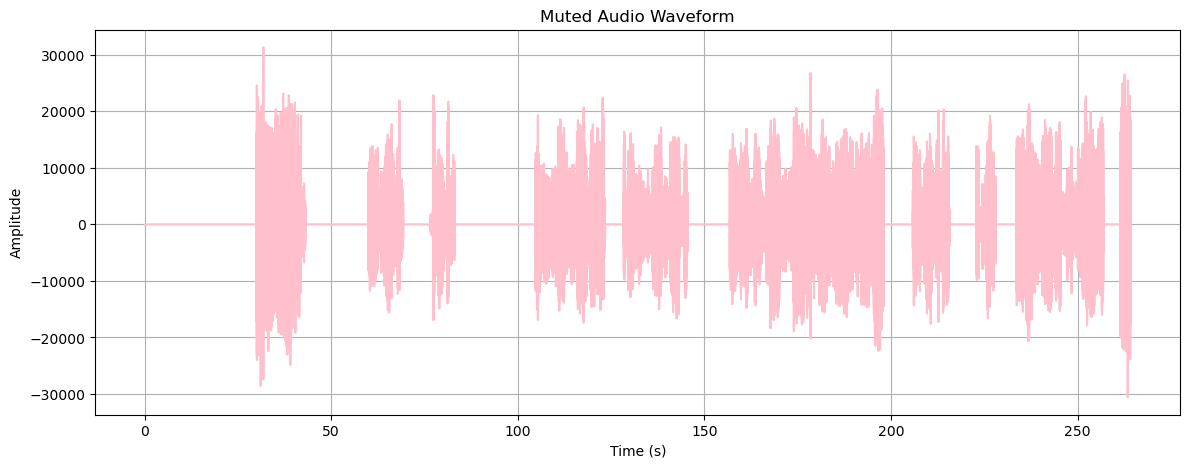

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/cp2/cp2_muted_audio.mp3'>

In [33]:
cp2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/cp2/CP_OTG_audio_07.mp3", cp2_laugh_times)
plot_muted_audio(cp2_muted_audio)
cp2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/cp2/cp2_muted_audio.mp3", format="mp3")

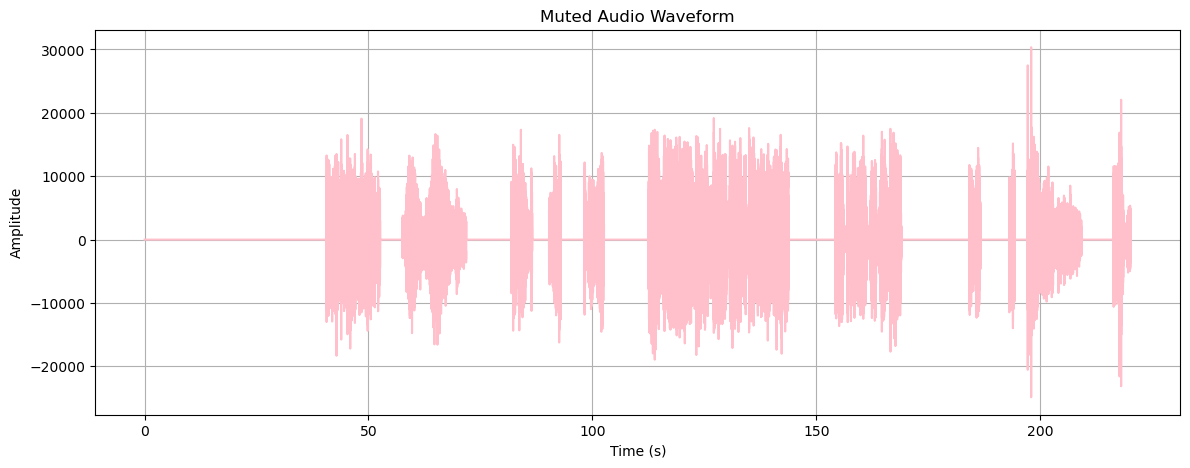

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/dg2/dg2_muted_audio.mp3'>

In [60]:
dg2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/dg2/DG_W_audio_07.mp3", dg2_laugh_times)
plot_muted_audio(dg2_muted_audio)
dg2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/dg2/dg2_muted_audio.mp3", format="mp3")

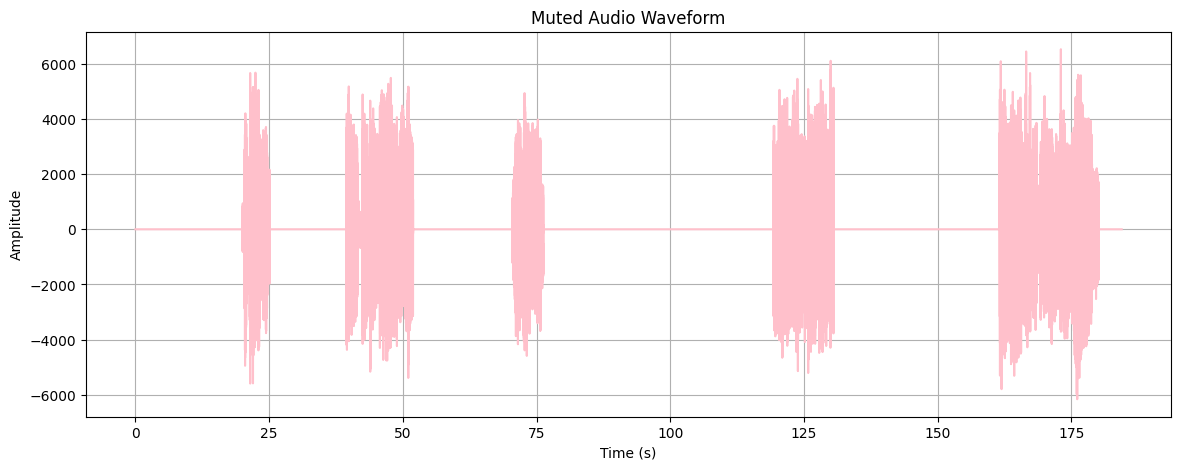

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/hm/hm_muted_audio.mp3'>

In [33]:
hm_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/hm/HM_HK_audio_05.mp3", hm_laugh_times)
plot_muted_audio(hm_muted_audio)
hm_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/hm/hm_muted_audio.mp3", format="mp3")

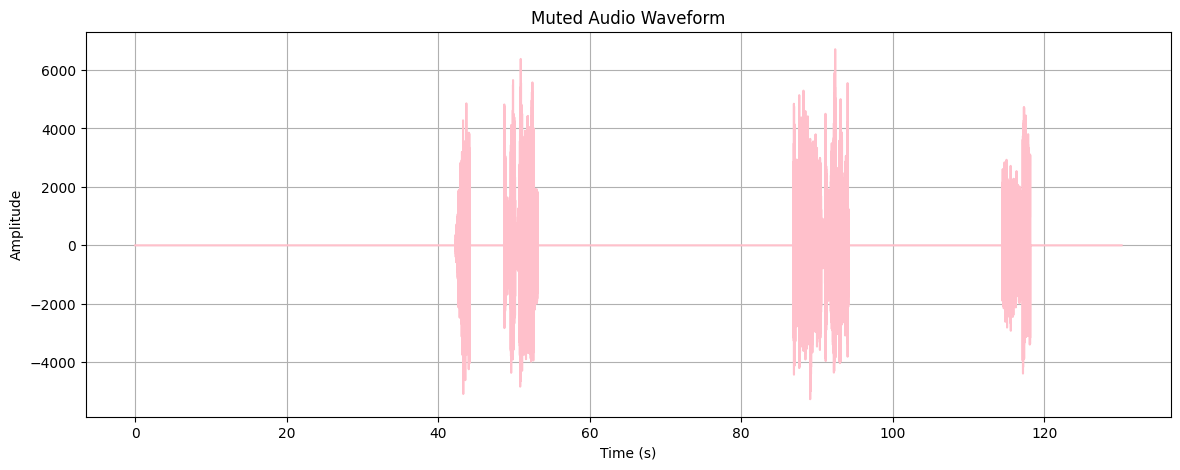

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/hm2/hm2_muted_audio.mp3'>

In [41]:
hm2_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/hm2/HM_HK_audio_22.mp3", hm2_laugh_times)
plot_muted_audio(hm2_muted_audio)
hm2_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/hm2/hm2_muted_audio.mp3", format="mp3")

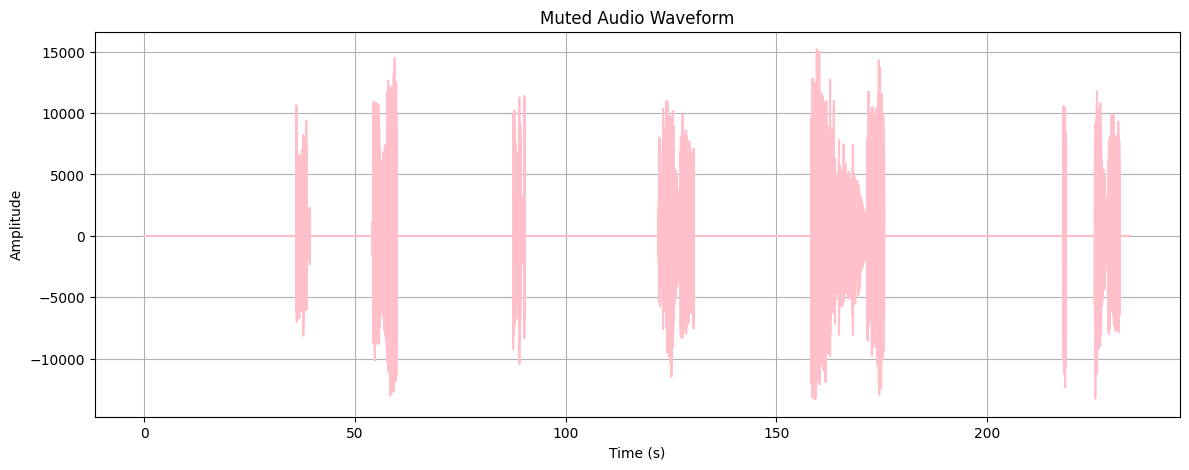

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/is/is_muted_audio.mp3'>

In [45]:
is_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/is/IS_EM_audio_18.mp3", is_laugh_times)
plot_muted_audio(is_muted_audio)
is_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/is/is_muted_audio.mp3", format="mp3")

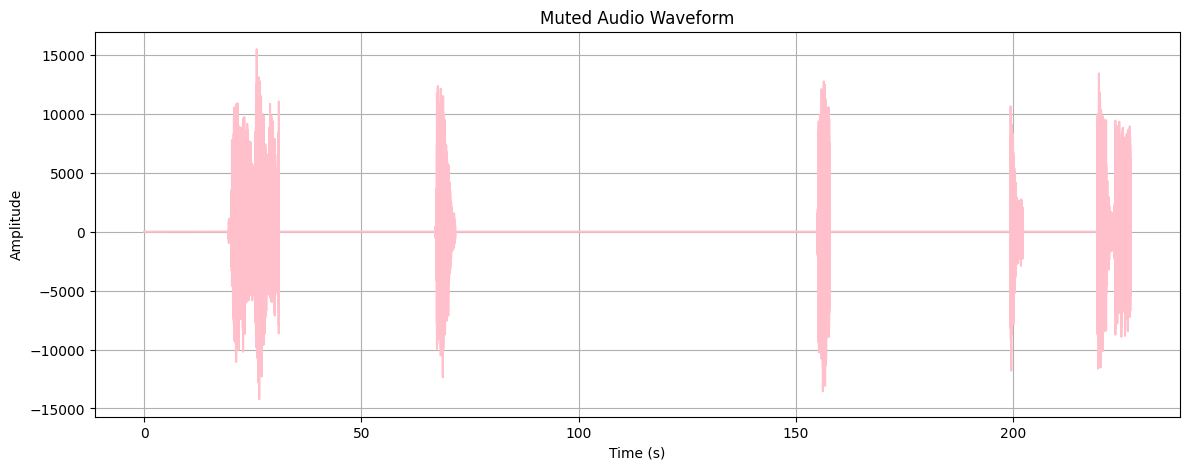

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/is2/is2_muted_audio.mp3'>

In [49]:
is2_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/is2/IS_EM_audio_20.mp3", is2_laugh_times)
plot_muted_audio(is2_muted_audio)
is2_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/is2/is2_muted_audio.mp3", format="mp3")

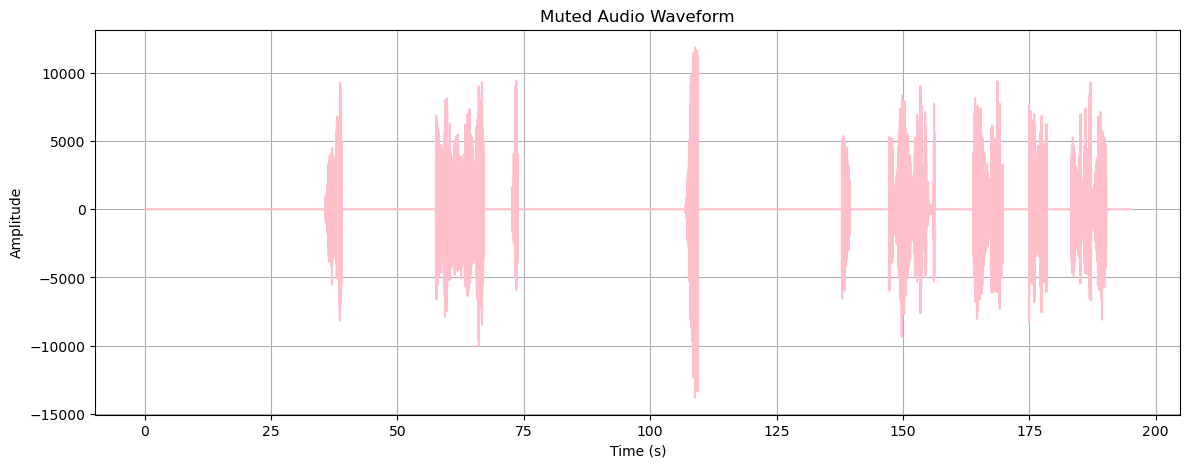

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jg/jg_muted_audio.mp3'>

In [65]:
jg_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jg/JG_QT_audio_03.mp3", jg_laugh_times)
plot_muted_audio(jg_muted_audio)
jg_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jg/jg_muted_audio.mp3", format="mp3")

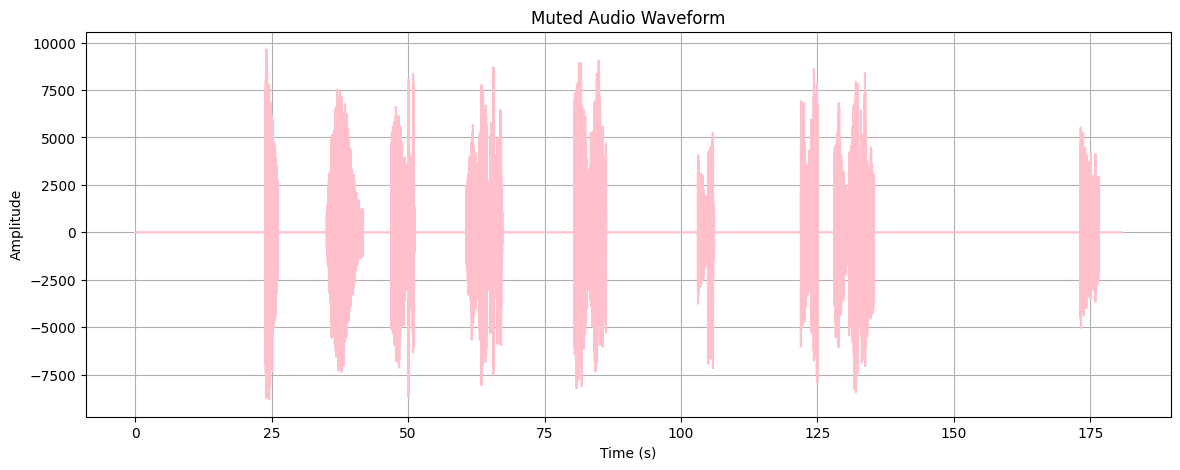

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/jg2/jg2_muted_audio.mp3'>

In [53]:
jg2_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/jg2/JG_QT_audio_14.mp3", jg2_laugh_times)
plot_muted_audio(jg2_muted_audio)
jg2_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/jg2/jg2_muted_audio.mp3", format="mp3")

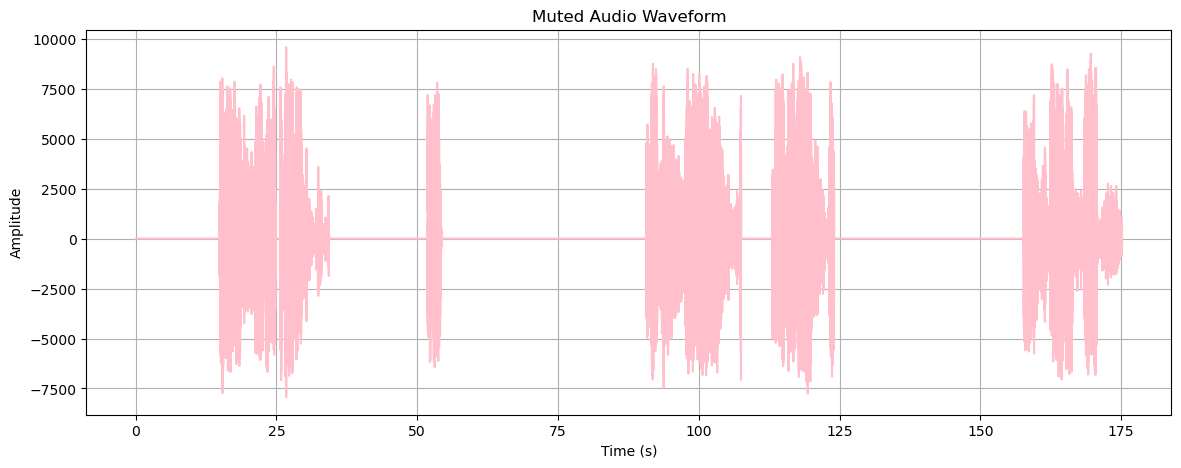

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/ji/jl_muted_audio.mp3'>

In [67]:
jl_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/ji/JL_IHM_audio_11.mp3", jl_laugh_times)
plot_muted_audio(jl_muted_audio)
jl_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/ji/jl_muted_audio.mp3", format="mp3")

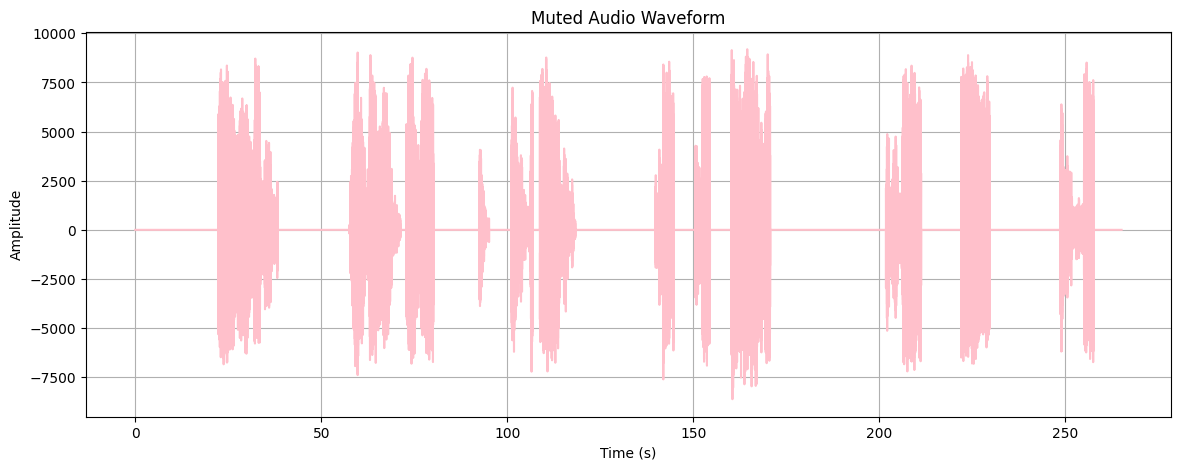

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/ji2/jl2_muted_audio.mp3'>

In [58]:
jl2_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/ji2/JL_IHM_audio_02.mp3", jl2_laugh_times)
plot_muted_audio(jl2_muted_audio)
jl2_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/ji2/jl2_muted_audio.mp3", format="mp3")

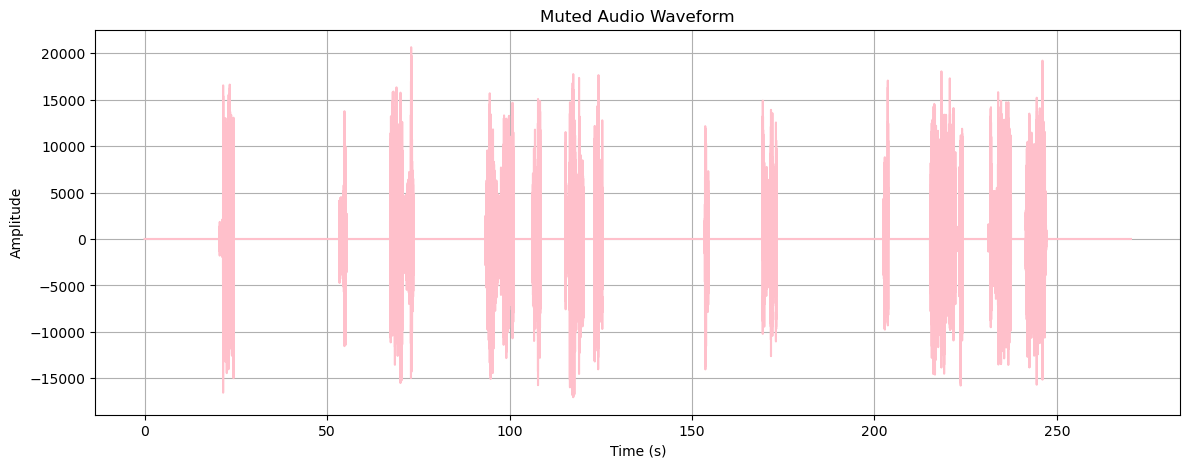

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jm2/jm2_muted_audio.mp3'>

In [69]:
jm2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jm2/JM_KDRC_audio_06.mp3", jm2_laugh_times)
plot_muted_audio(jm2_muted_audio)
jm2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jm2/jm2_muted_audio.mp3", format="mp3")

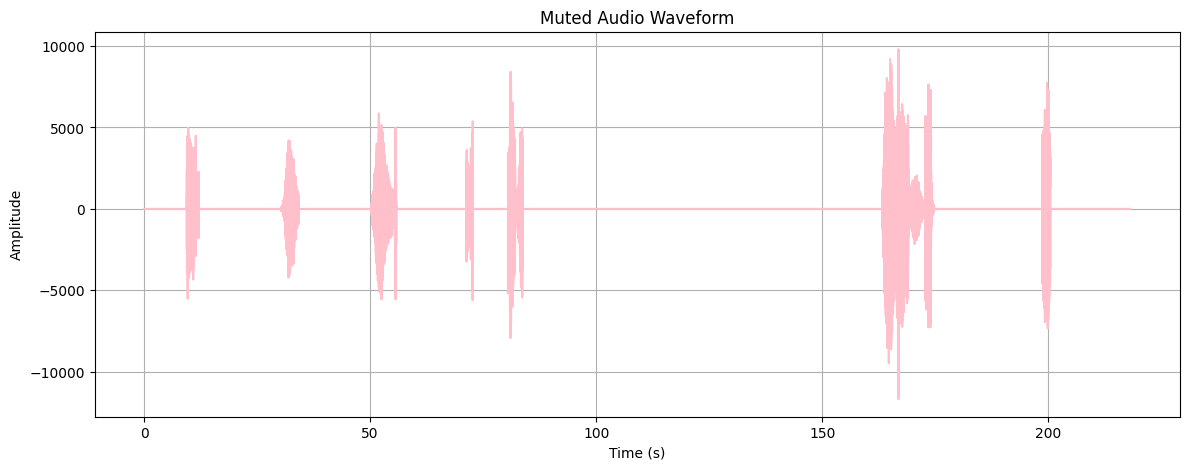

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/jy/jy_muted_audio.mp3'>

In [71]:
jy_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/jy/JY_GD_audio_09.mp3", jy_laugh_times)
plot_muted_audio(jy_muted_audio)
jy_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/jy/jy_muted_audio.mp3", format="mp3")

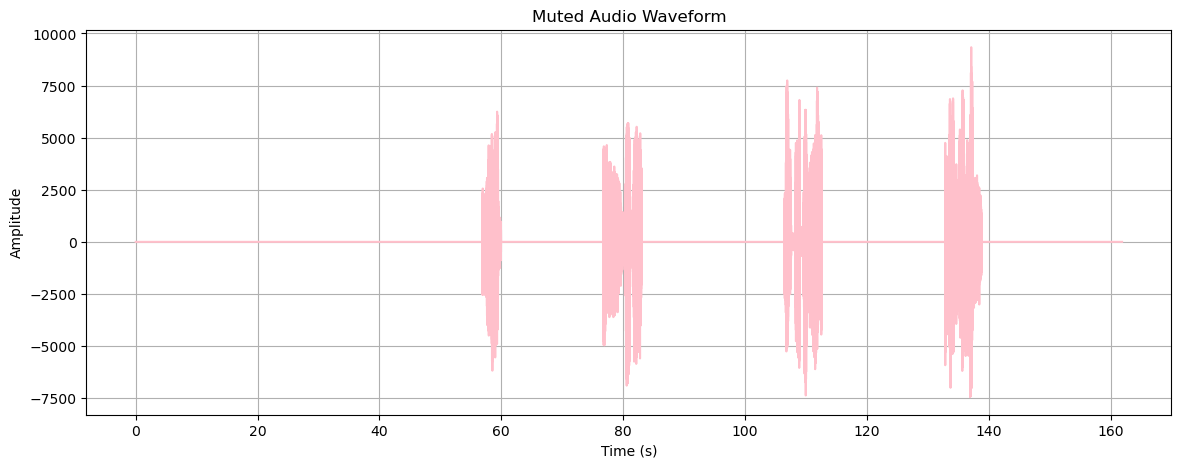

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/jy2/jy2_muted_audio.mp3'>

In [71]:
jy2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/jy2/JY_GD_audio_19.mp3", jy2_laugh_times)
plot_muted_audio(jy2_muted_audio)
jy2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/jy2/jy2_muted_audio.mp3", format="mp3")

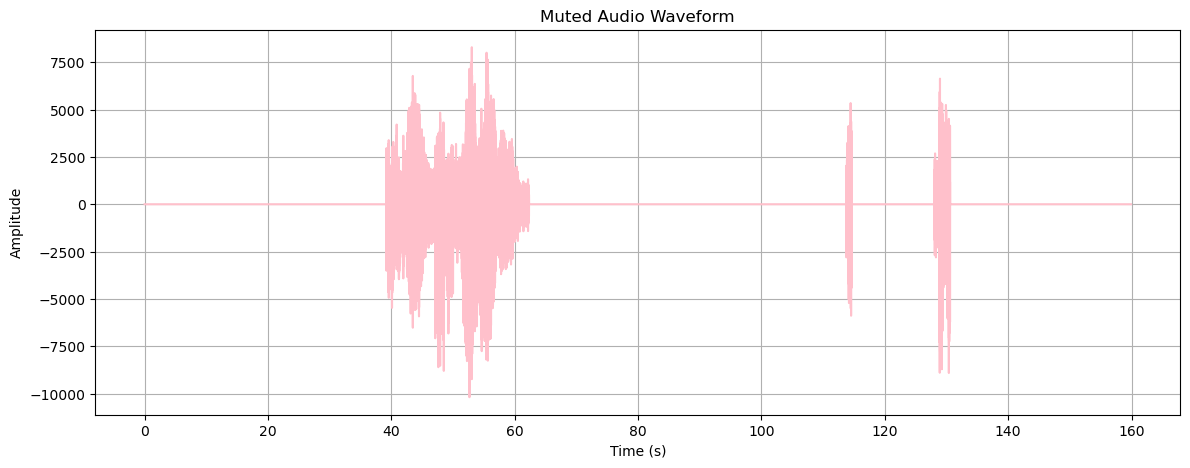

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/lck2/lck2_muted_audio.mp3'>

In [72]:
lck2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/lck2/LCK_SY_audio_20.mp3", lck2_laugh_times)
plot_muted_audio(lck2_muted_audio)
lck2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/lck2/lck2_muted_audio.mp3", format="mp3")

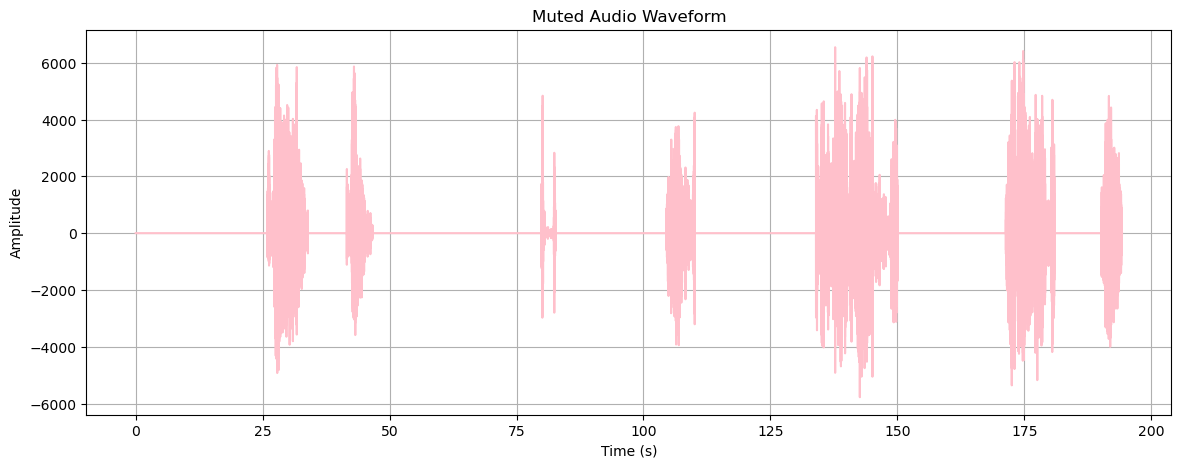

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/nb/nb_muted_audio.mp3'>

In [73]:
nb_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/nb/NB_TGAA_audio_09.mp3", nb_laugh_times)
plot_muted_audio(nb_muted_audio)
nb_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/nb/nb_muted_audio.mp3", format="mp3")

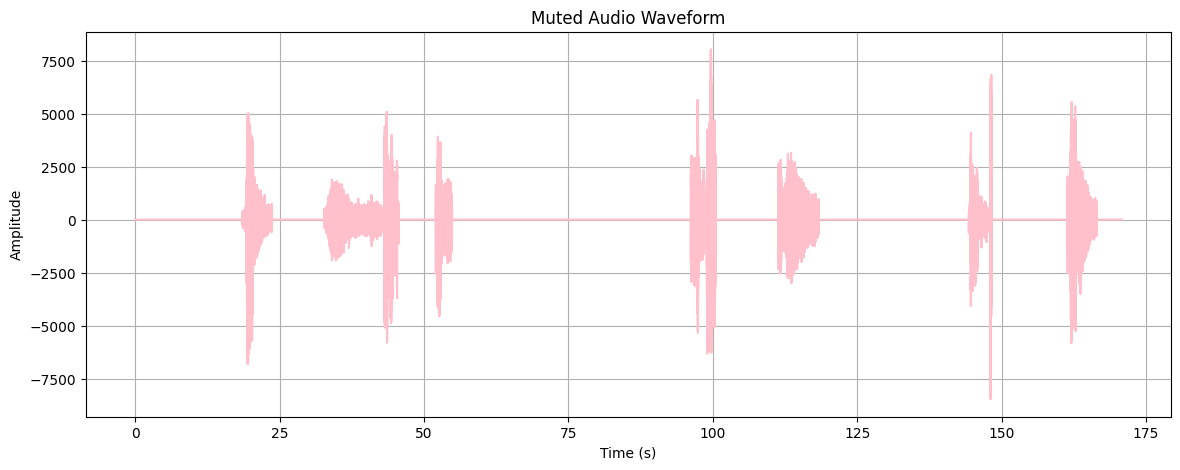

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/nb_tk/nb_tk_muted_audio.mp3'>

In [80]:
nb_tk_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/nb_tk/NB_TK_audio_20.mp3", nb_tk_laugh_times)
plot_muted_audio(nb_tk_muted_audio)
nb_tk_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/nb_tk/nb_tk_muted_audio.mp3", format="mp3")

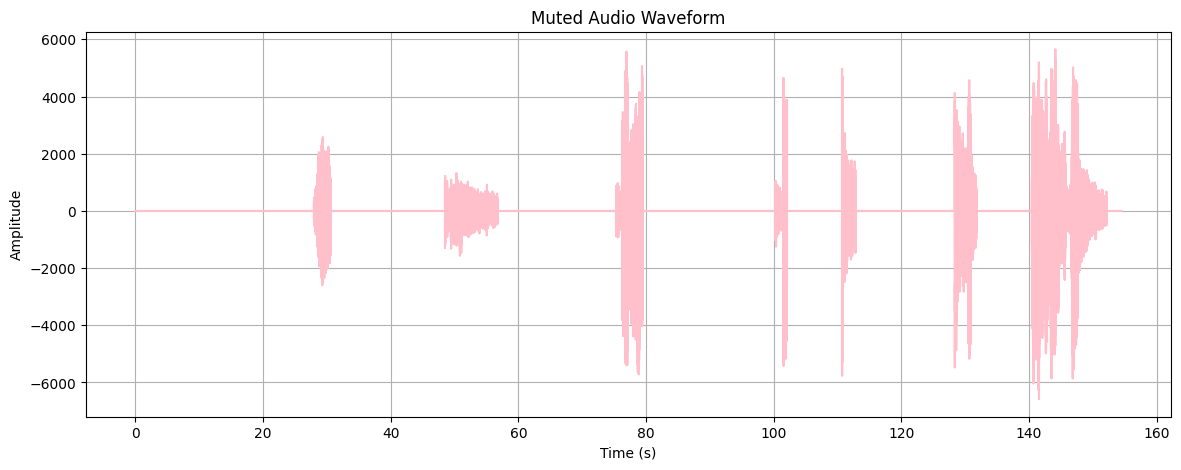

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/nb_tk2/nb_tk2_muted_audio.mp3'>

In [82]:
nb_tk2_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/nb_tk2/NB_TK_audio_17.mp3", nb_tk2_laugh_times)
plot_muted_audio(nb_tk2_muted_audio)
nb_tk2_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/nb_tk2/nb_tk2_muted_audio.mp3", format="mp3")

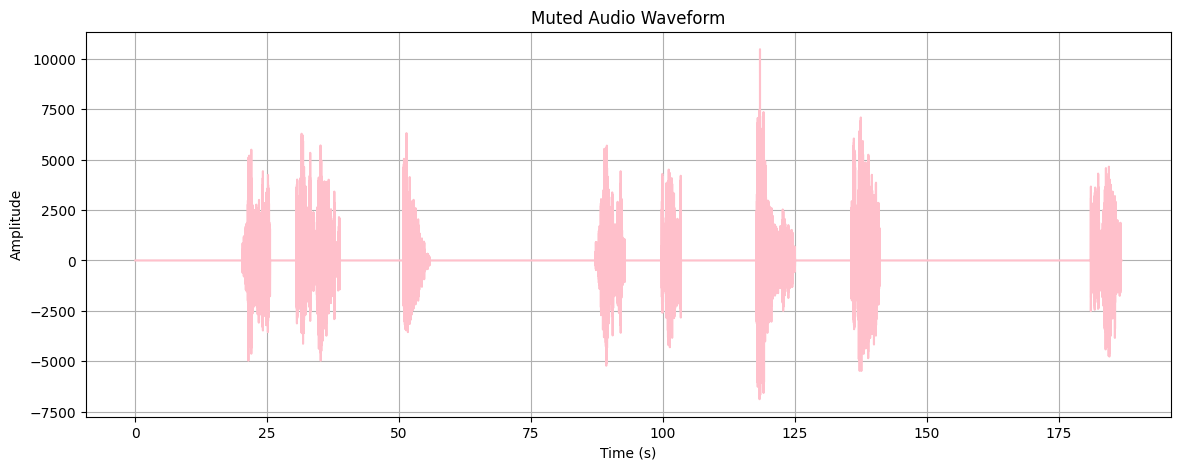

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/nb2/nb2_muted_audio.mp3'>

In [73]:
nb2_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/nb2/NB_TGAA_audio_14.mp3", nb2_laugh_times)
plot_muted_audio(nb2_muted_audio)
nb2_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/nb2/nb2_muted_audio.mp3", format="mp3")

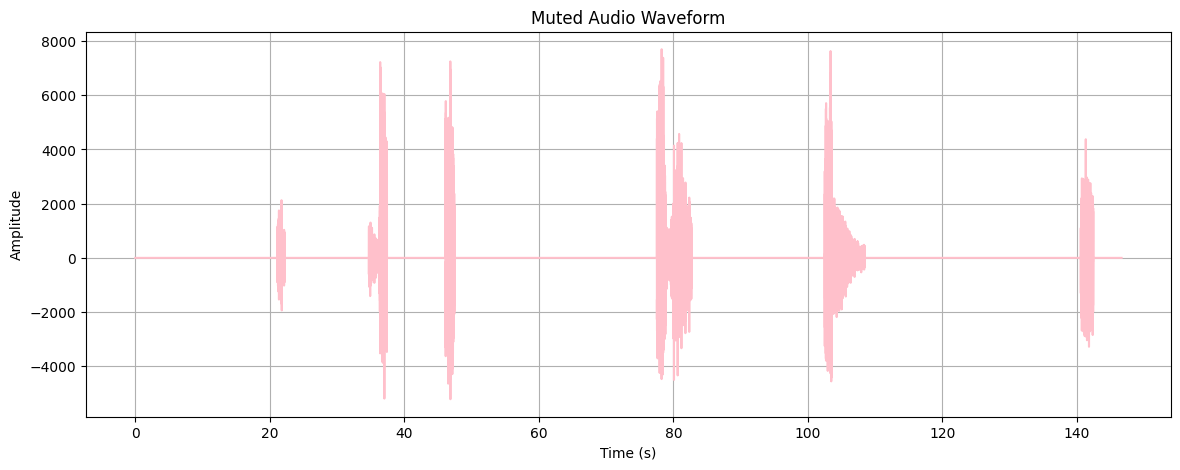

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/rp/rp_muted_audio.mp3'>

In [85]:
rp_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/rp/RP_DP_audio_06.mp3", rp_laugh_times)
plot_muted_audio(rp_muted_audio)
rp_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/rp/rp_muted_audio.mp3", format="mp3")

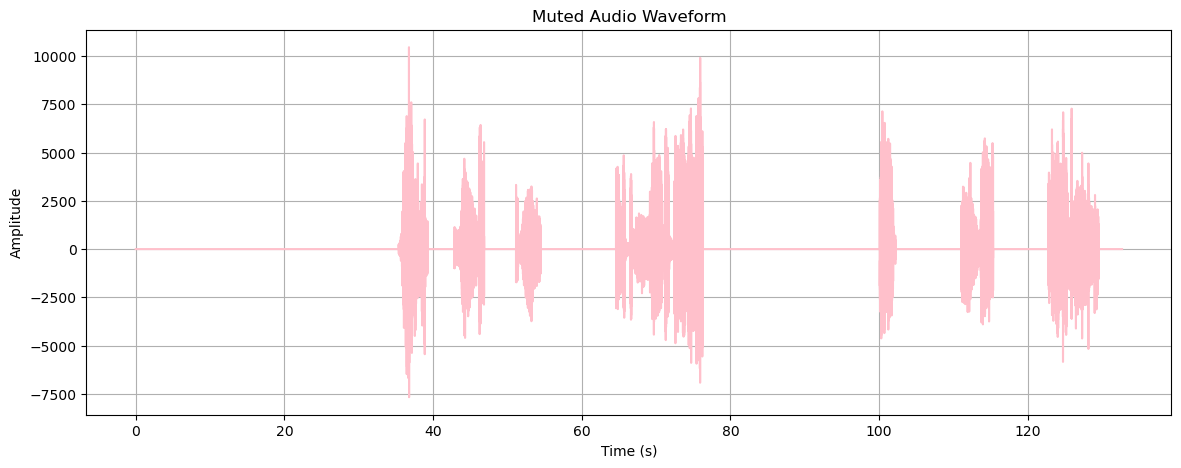

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/rp2/rp2_muted_audio.mp3'>

In [79]:
rp2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/rp2/RP_DP_audio_21.mp3", rp2_laugh_times)
plot_muted_audio(rp2_muted_audio)
rp2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/rp2/rp2_muted_audio.mp3", format="mp3")

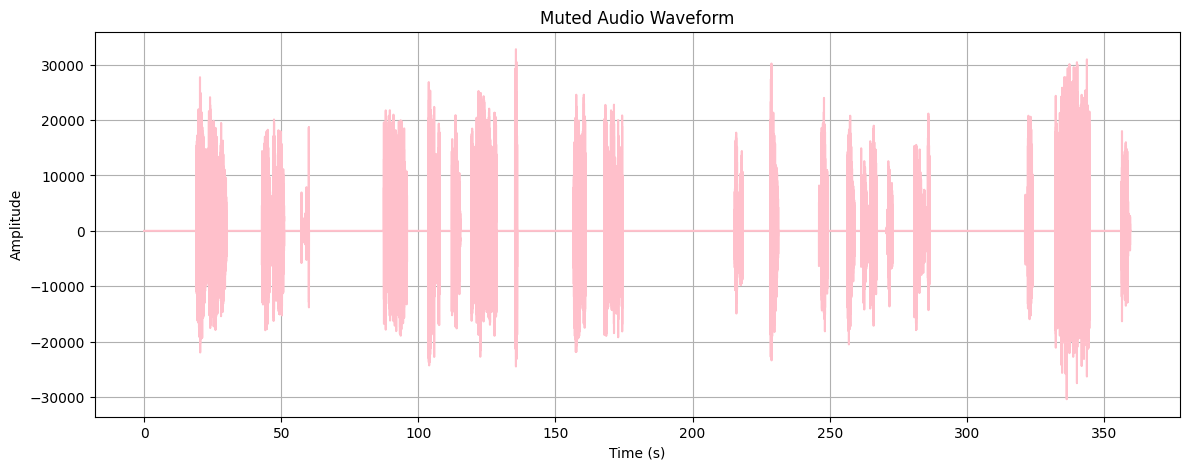

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/sm/sm_muted_audio.mp3'>

In [87]:
sm_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/sm/SM_IGT_audio_04.mp3", sm_laugh_times)
plot_muted_audio(sm_muted_audio)
sm_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/sm/sm_muted_audio.mp3", format="mp3")

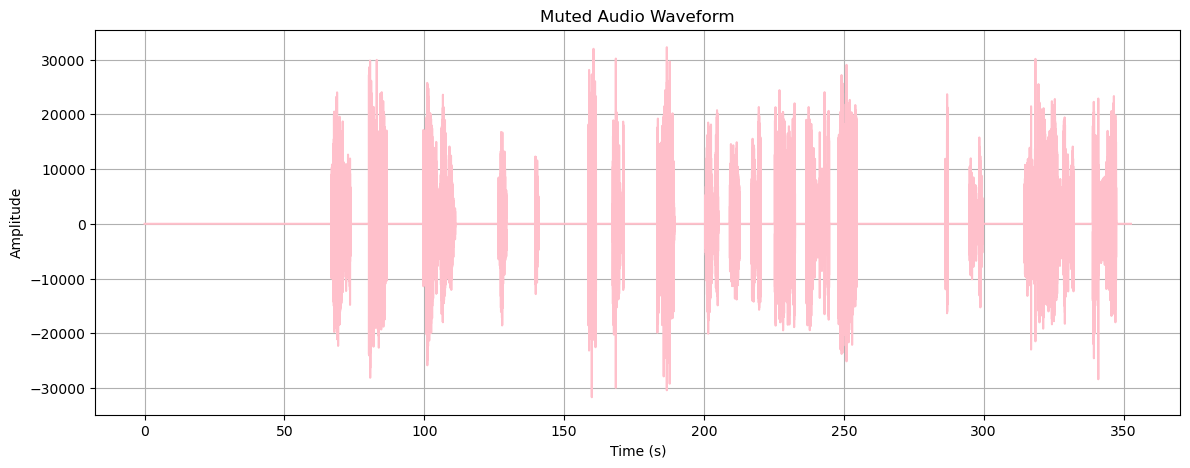

<_io.BufferedRandom name='/Users/ada/Developer/humor/stand_up_dataset/sm2/sm2_muted_audio.mp3'>

In [81]:
sm2_muted_audio = create_nonlaughter_audio("/Users/ada/Developer/humor/stand_up_dataset/sm2/SM_IGT_audio_13.mp3", sm2_laugh_times)
plot_muted_audio(sm2_muted_audio)
sm2_muted_audio.export("/Users/ada/Developer/humor/stand_up_dataset/sm2/sm2_muted_audio.mp3", format="mp3")

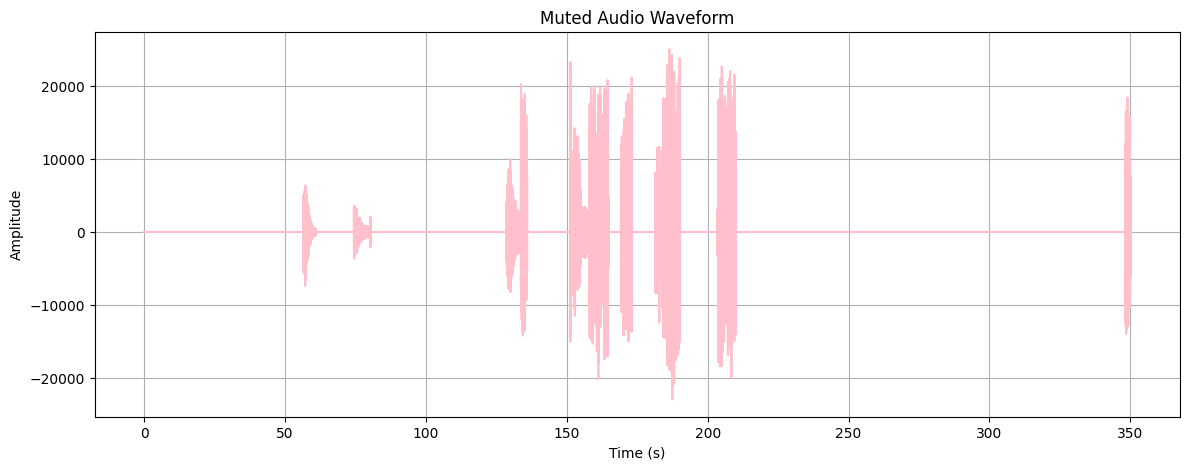

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/tn/tn_muted_audio.mp3'>

In [91]:
tn_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/tn/TN_AD_audio_16.mp3", tn_laugh_times)
plot_muted_audio(tn_muted_audio)
tn_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/tn/tn_muted_audio.mp3", format="mp3")

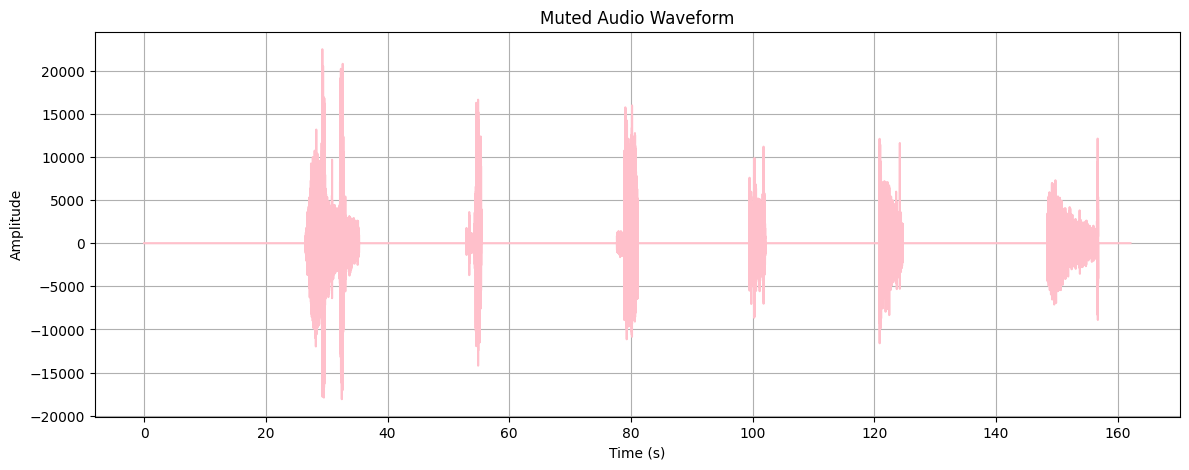

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/tn2/tn2_muted_audio.mp3'>

In [94]:
tn2_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/tn2/TN_AD_audio_14.mp3", tn2_laugh_times)
plot_muted_audio(tn2_muted_audio)
tn2_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/tn2/tn2_muted_audio.mp3", format="mp3")

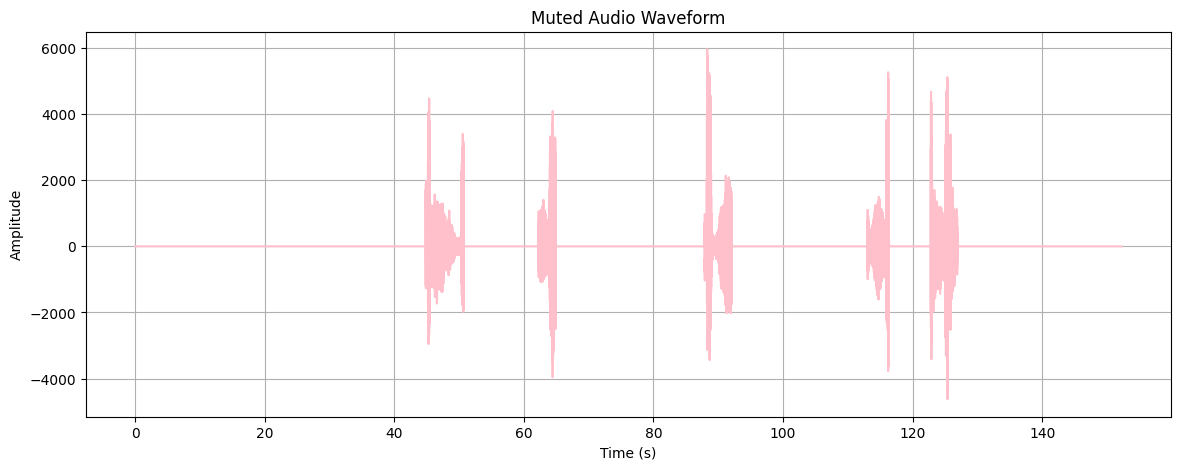

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/ts/ts_muted_audio.mp3'>

In [97]:
ts_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/ts/TS_D_audio_09.mp3", ts_laugh_times)
plot_muted_audio(ts_muted_audio)
ts_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/ts/ts_muted_audio.mp3", format="mp3")

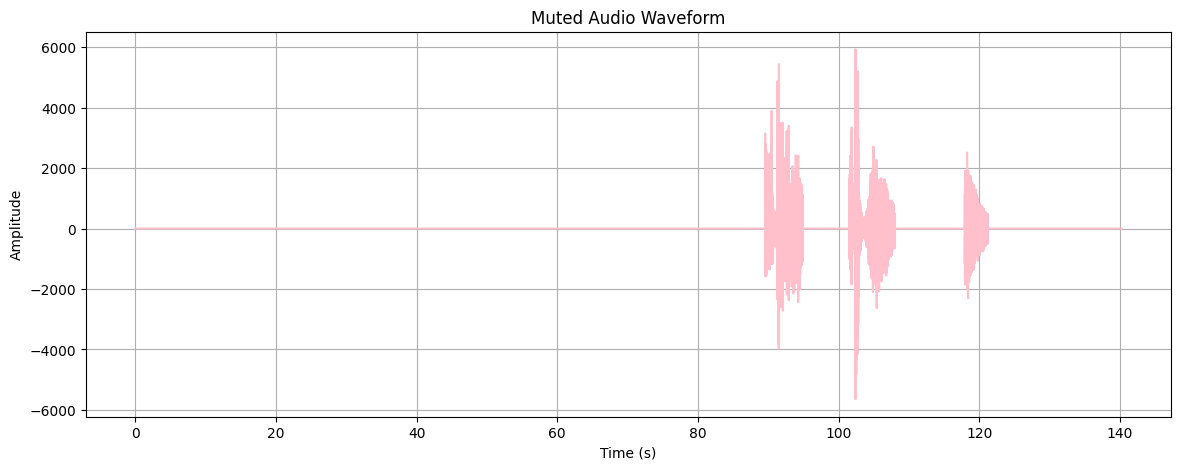

<_io.BufferedRandom name='/home/ada/humor/humor/stand_up_dataset/ts2/ts2_muted_audio.mp3'>

In [102]:
ts2_muted_audio = create_nonlaughter_audio("/home/ada/humor/humor/stand_up_dataset/ts2/TS_D_audio_15.mp3", ts2_laugh_times)
plot_muted_audio(ts2_muted_audio)
ts2_muted_audio.export("/home/ada/humor/humor/stand_up_dataset/ts2/ts2_muted_audio.mp3", format="mp3")